# 프로젝트 개요

## 월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회

## 데이터 출처
- 데이콘: [https://dacon.io/competitions/official/235713/overview/description](https://dacon.io/competitions/official/235713/overview/description)

## 데이터 설명

### train.csv
- **train 데이터**: 신용카드 사용자들의 개인 신상정보
- **credit 열 포함**
- **train.shape**: (26457, 20)

### test.csv
- **test 데이터**: 신용카드 사용자들의 개인 신상정보
- **credit 열 미포함**
- **test.shape**: (10000, 19)

### sample_submission.csv
- **정답 제출 파일**
- **sample_submission.shape**: (10000, 4)

## 데이터 변수 설명
- **index**: 인덱스
- **gender**: 성별
- **car**: 차량 소유 여부
- **reality**: 부동산 소유 여부
- **child_num**: 자녀 수
- **income_total**: 연간 소득
- **income_type**: 소득 분류 (['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student'])
- **edu_type**: 교육 수준 (['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'])
- **family_type**: 결혼 여부 (['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow'])
- **house_type**: 생활 방식 (['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment'])
- **DAYS_BIRTH**: 출생일 (데이터 수집 당시 (0)부터 역으로 셈)
- **DAYS_EMPLOYED**: 업무 시작일 (데이터 수집 당시 (0)부터 역으로 셈)
- **FLAG_MOBIL**: 핸드폰 소유 여부
- **work_phone**: 업무용 전화 소유 여부
- **phone**: 전화 소유 여부
- **email**: 이메일 소유 여부
- **occyp_type**: 직업 유형
- **family_size**: 가족 규모
- **begin_month**: 신용카드 발급 월 (데이터 수집 당시 (0)부터 역으로 셈)
- **credit**: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (낮을수록 높은 신용의 신용카드 사용자 의미)

## 데이터 시각화
- 범주형 변수에 대한 countplot과 수치형 변수에 대한 히스토그램 및 boxplot을 생성하여 데이터의 분포를 분석합니다.
- credit 컬럼에 대한 히스토그램을 통해 신용 분포를 확인합니다.

## 모델링
- XGBoost 모델을 사용하여 신용카드 사용자 연체 예측 모델을 개발합니다.
- RandomizedSearchCV를 통해 최적의 하이퍼파라미터를 찾습니다.

## 결과
- 최적 모델: XGBoost
- Log Loss: 0.7355768898344893
- Accuracy Score: 0.7245485977718018
- 모델 변수 중요도 시각화 결과: begin_month가 가장 중요한 변수로 인식됩니다.


## EDA

왜도, 첨도 기울어지면 중앙값으로 대치, 로그 변환도 좋음

카테고리 널값은 Unkwon으로 처리: 도메인 지식으로 판단

순서, 등급 필요없는 경우 라벨 인코딩 -> 어느 정도 정보 로스 존재

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV 파일 경로 (Google Drive 내 파일 경로로 변경)
file_path = '/content/drive/MyDrive/메타코드_M/train.csv'  # 자신의 파일 경로로 수정


# Pandas를 사용하여 CSV 파일 읽기
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
df.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
df.isna().sum()

,0
index,0
gender,0
car,0
reality,0
child_num,0
income_total,0
income_type,0
edu_type,0
family_type,0
house_type,0


    'index': '고유 인덱스',
    'gender': '성별',
    'car': '자동차 소유 여부',
    'reality': '부동산 소유 여부',
    'child_num': '자녀 수',
    'income_total': '총 소득',
    'income_type': '소득 유형',
    'edu_type': '교육 수준',
    'family_type': '가족 유형',
    'house_type': '주택 유형',
    'DAYS_BIRTH': '출생일 (현재 날짜 기준, 일 단위, 음수 값)',
    'DAYS_EMPLOYED': '고용 시작일 (현재 날짜 기준, 일 단위, 양수 값은 고용되지 않은 상태를 의미하며, 음수 값은 고용된 기간)',
    'FLAG_MOBIL': '휴대전화 소유 여부',
    'work_phone': '직장 전화 소유 여부',
    'phone': '전화 소유 여부',
    'email': '이메일 소유 여부',
    'occyp_type': '직업 유형',
    'family_size': '가족 규모',
    'begin_month': '신용카드 발급 월 (현재 날짜 기준, 개월 단위, 음수 값)',
    'credit': '신용 등급'

In [ ]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
# 컬럼별 유니크한 값의 개수
unique_len = df.apply(lambda x : len(x.unique()))
unique_len

,0
index,26457
gender,2
car,2
reality,2
child_num,9
income_total,249
income_type,5
edu_type,5
family_type,5
house_type,6


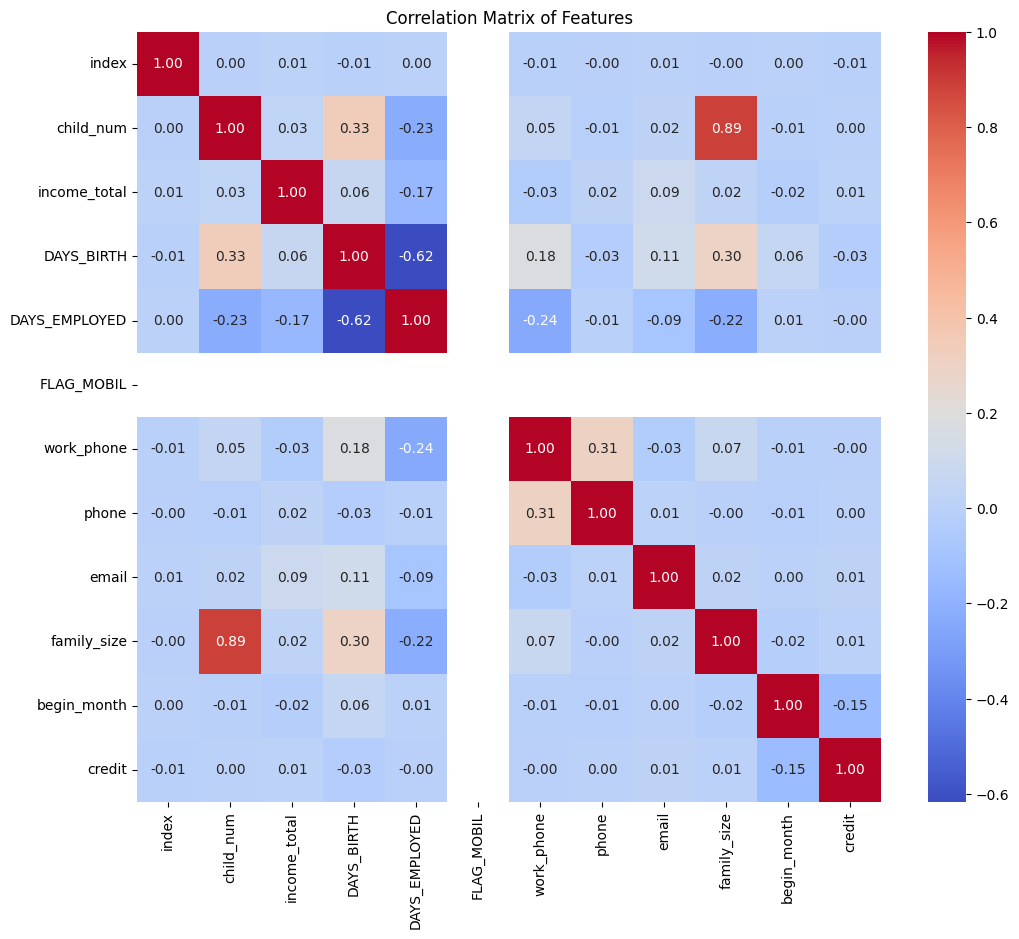

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관관계 계산
correlation_matrix = df.corr(numeric_only=True)

# 히트맵으로 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# 가족 크기와 아이 수 둘 중 하나만 사용

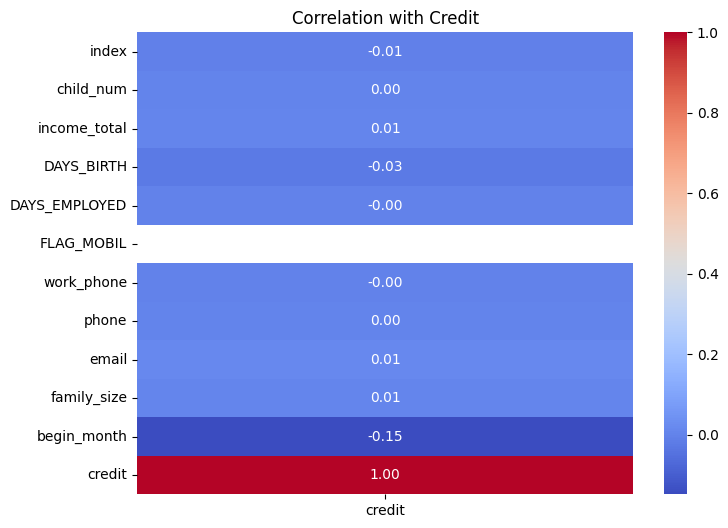

In [ ]:
# 상관관계 계산 (credit 컬럼만)
credit_correlation = df.corr(numeric_only=True)['credit']

# credit 컬럼과의 상관관계를 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(credit_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Credit')
plt.show()

In [ ]:
df['gender'] = df['gender'].replace(['F','M'], [0,  1])
df['car'] = df['car'].replace(['N','Y'], [0,  1])
df['reality'] = df['reality'].replace(['N','Y'], [0,  1])
df.head()

<ipython-input-10-7cb0a3b3a367>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(['F','M'], [0,  1])
<ipython-input-10-7cb0a3b3a367>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['car'] = df['car'].replace(['N','Y'], [0,  1])
<ipython-input-10-7cb0a3b3a367>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opt

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
# DAYS_BIRTH, DAYS_EMPLOYED, begin_month 컬럼 양수로 변경
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])
df['begin_month'] = abs(df['begin_month'])

df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,1,0,0,0,NaN,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,1,0,0,1,Laborers,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,1,0,1,0,Managers,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,1,0,1,0,Sales staff,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,1,0,0,0,Managers,2.0,26.0,2.0


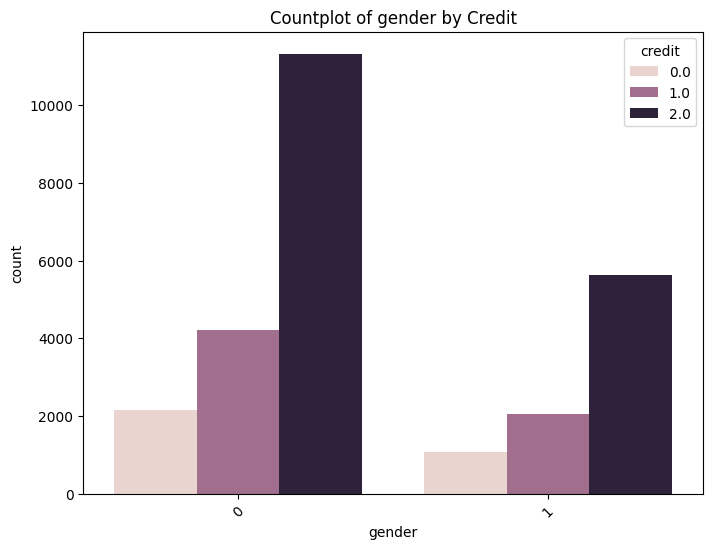

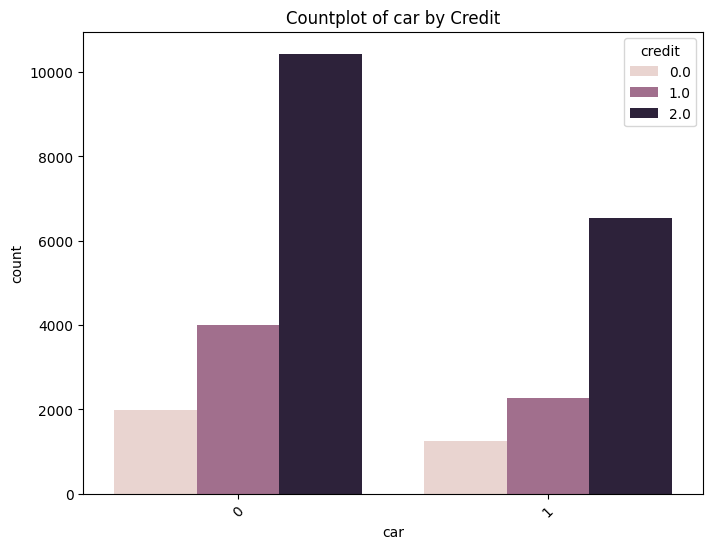

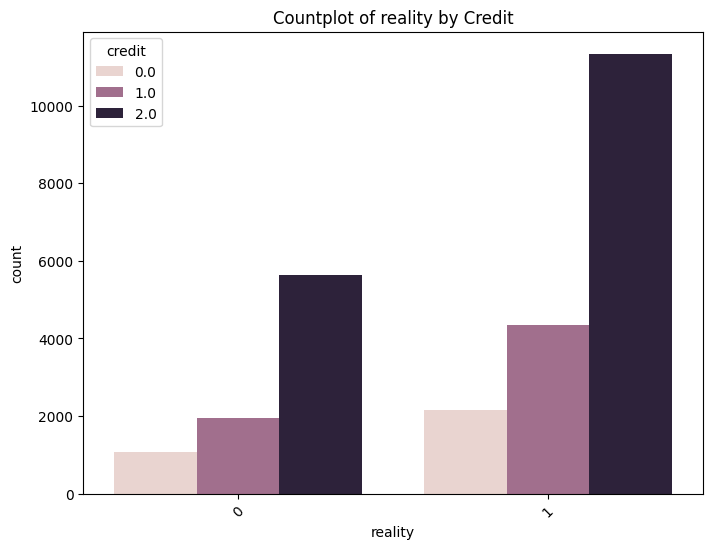

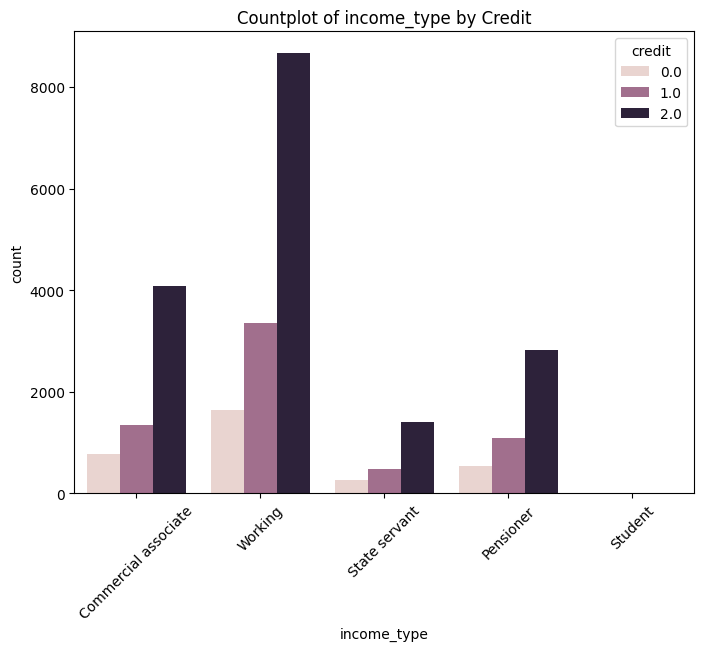

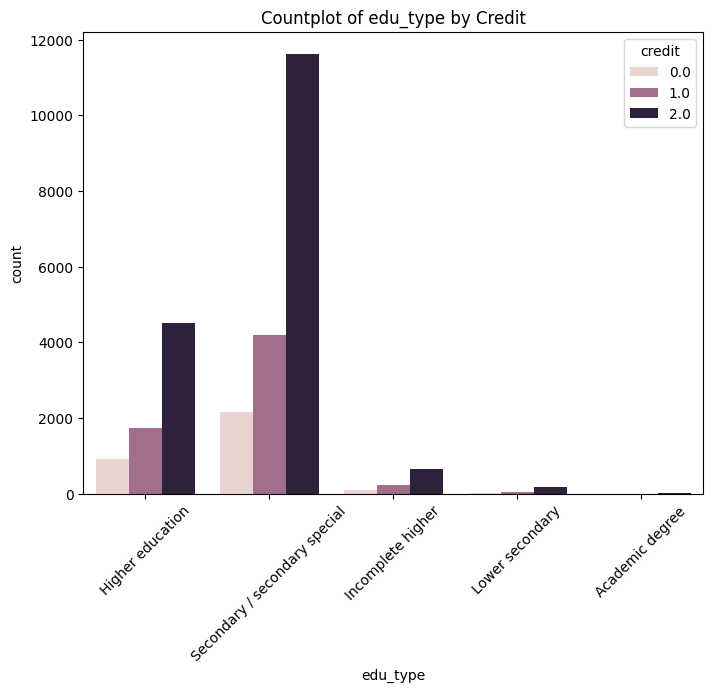

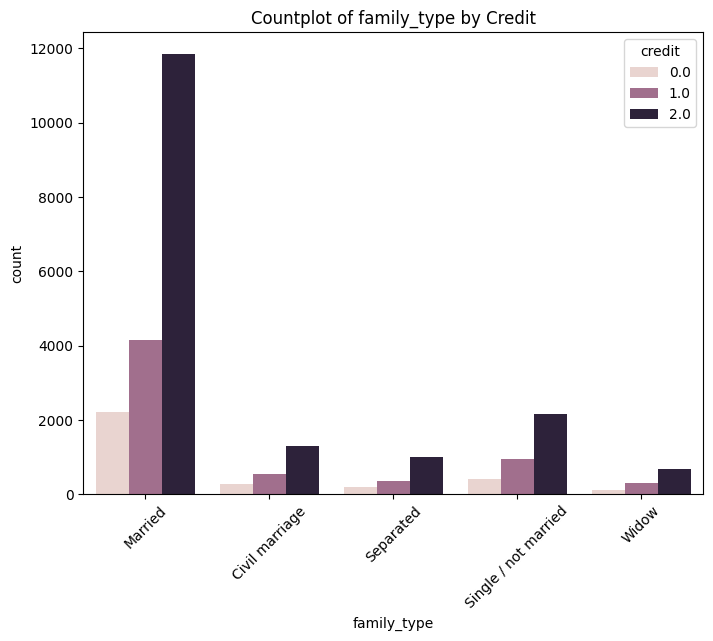

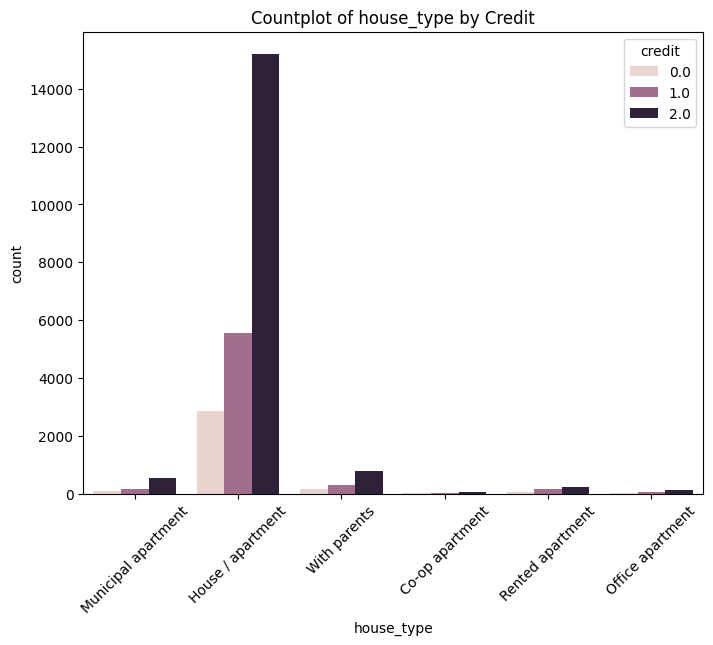

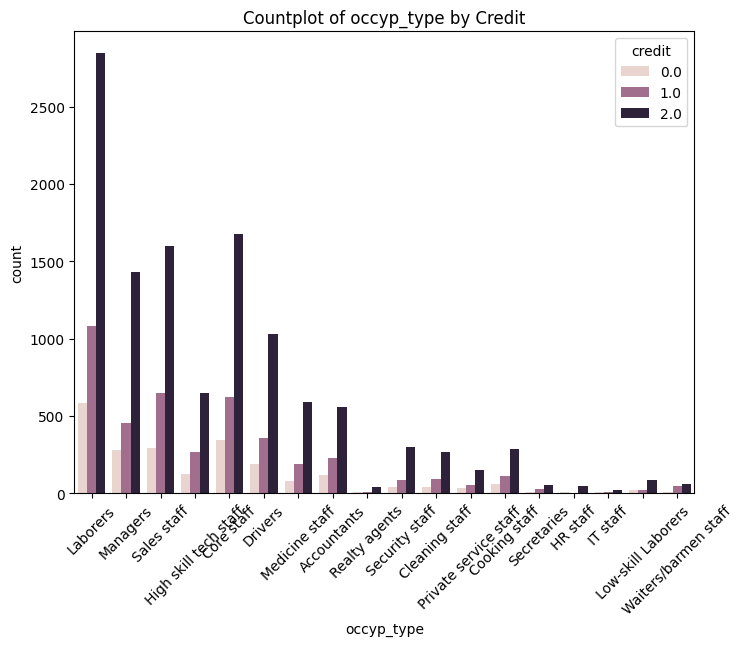

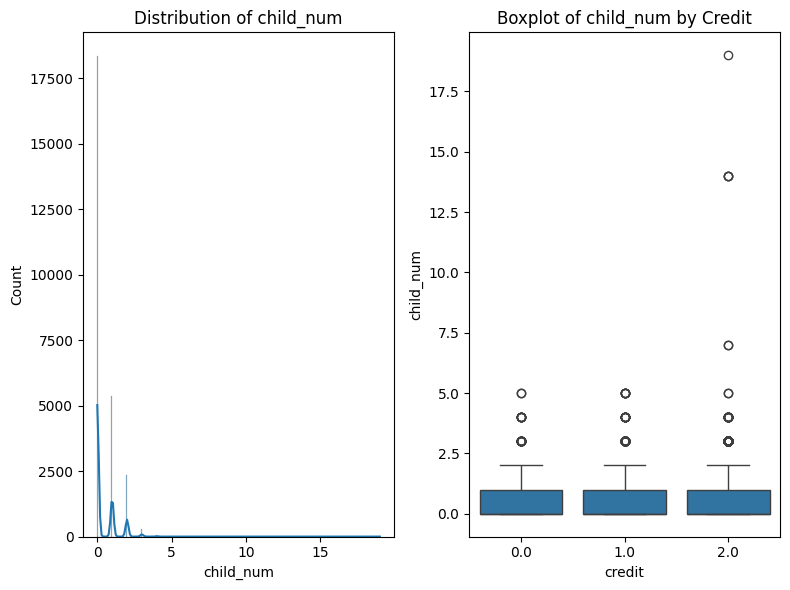

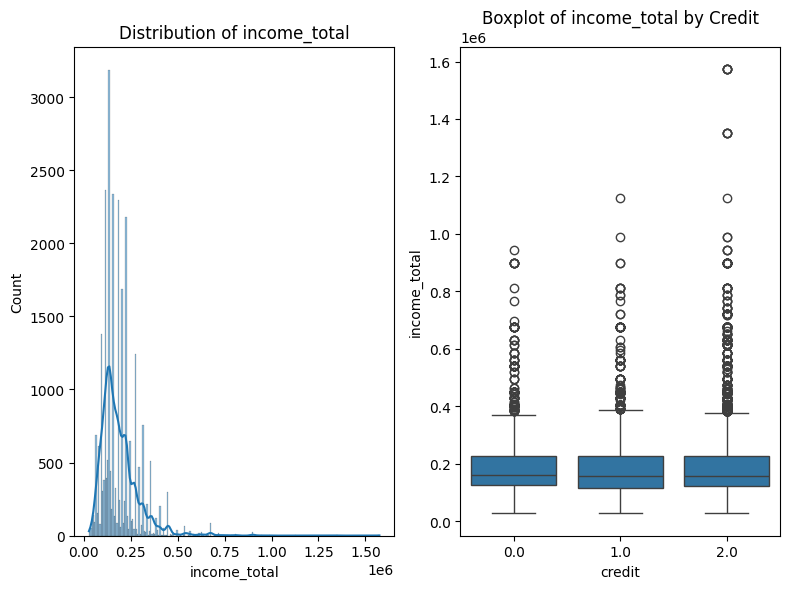

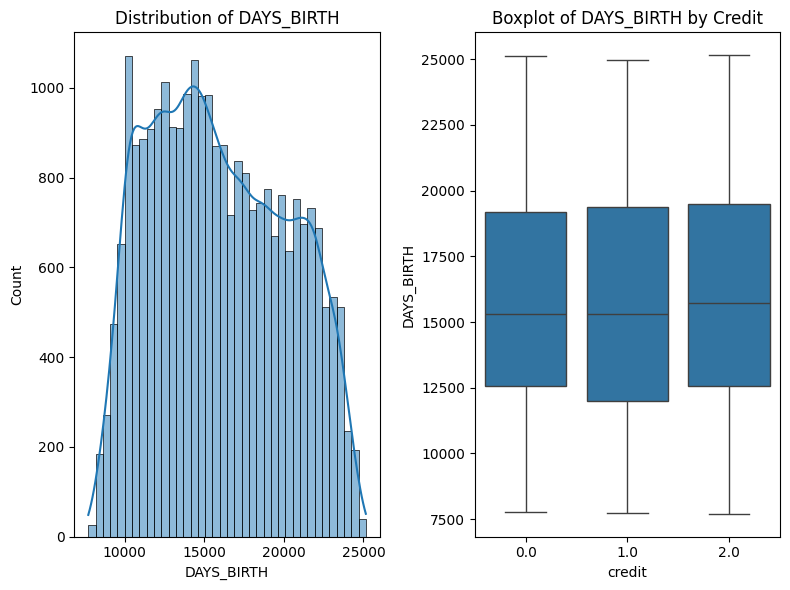

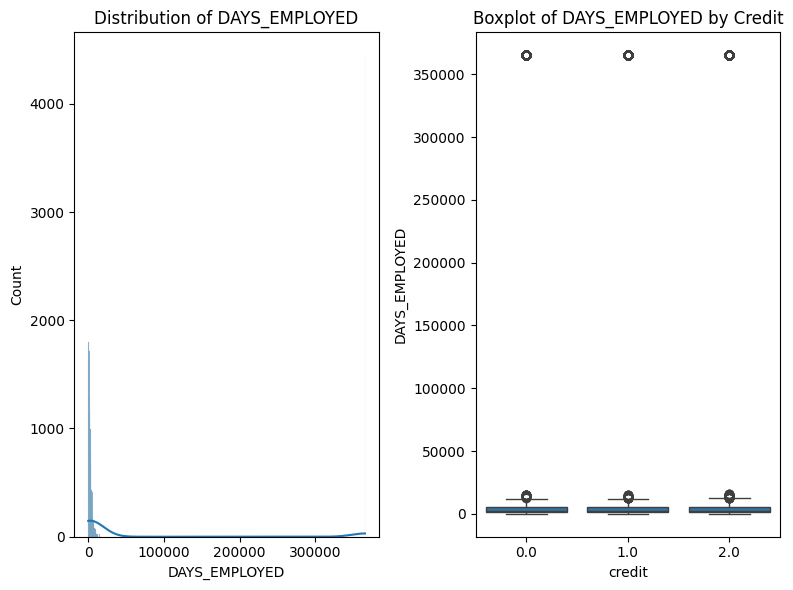

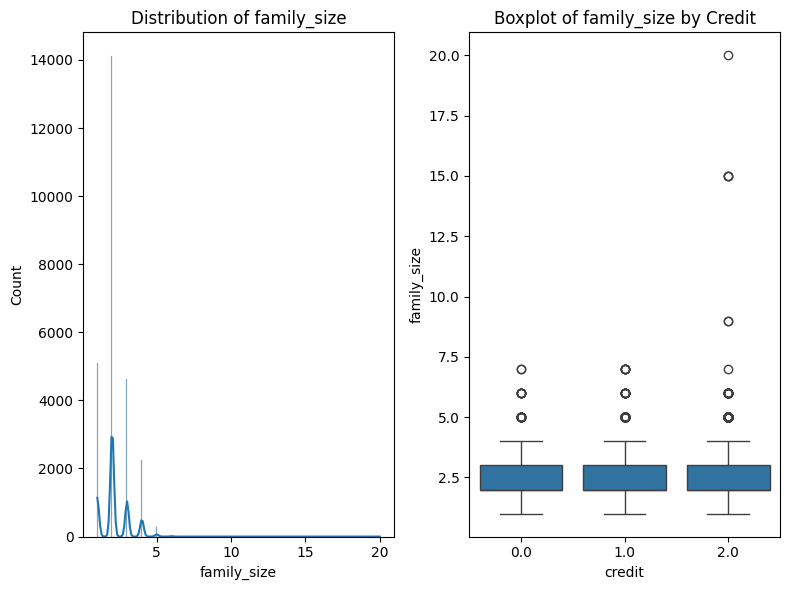

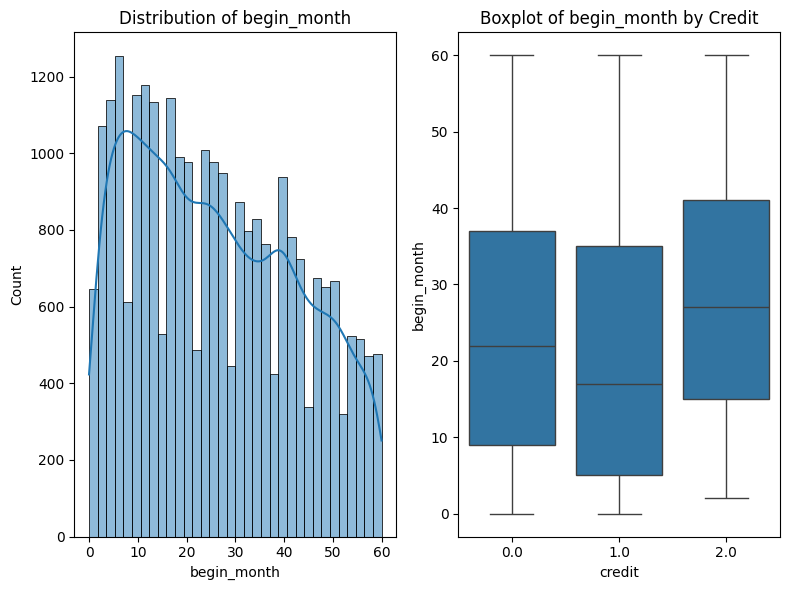

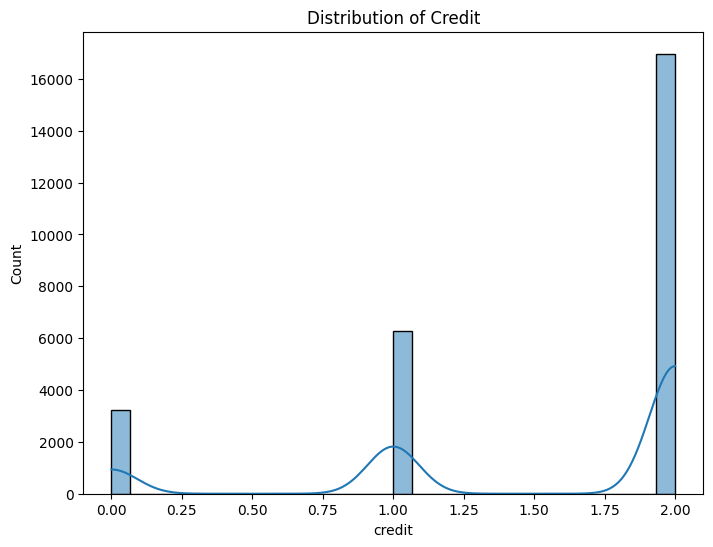

In [ ]:
# 범주형 변수에 대한 countplot 생성
categorical_cols = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, hue='credit')
    plt.title(f'Countplot of {col} by Credit')
    plt.xticks(rotation=45)
    plt.show()

# 수치형 변수에 대한 히스토그램과 boxplot 생성
numerical_cols = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='credit', y=col, data=df)
    plt.title(f'Boxplot of {col} by Credit')

    plt.tight_layout()
    plt.show()

# credit 컬럼에 대한 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(df['credit'], kde=True)
plt.title('Distribution of Credit')
plt.show()

# 여성 데이터가 많다
# 전체적으로 신용 2등급 비율이 높다
# 남자가 집을 가진 경우 신용 2등급인 비율이 높다
# 고졸 비율이 가장 높다.
# 결혼한 사람들이 많다.
# 집이나 아파트를 소유한 사람들이 많다.

# 자식 숫자의 이상치가 존재한다.
# 수입에 이상치가 존재한다.
# 고용 날짜에 극단적 이상치가 존재한다.

<ipython-input-13-74087636ef00>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_total_log'] = np.log1p(df['income_total']) # 로그 변환


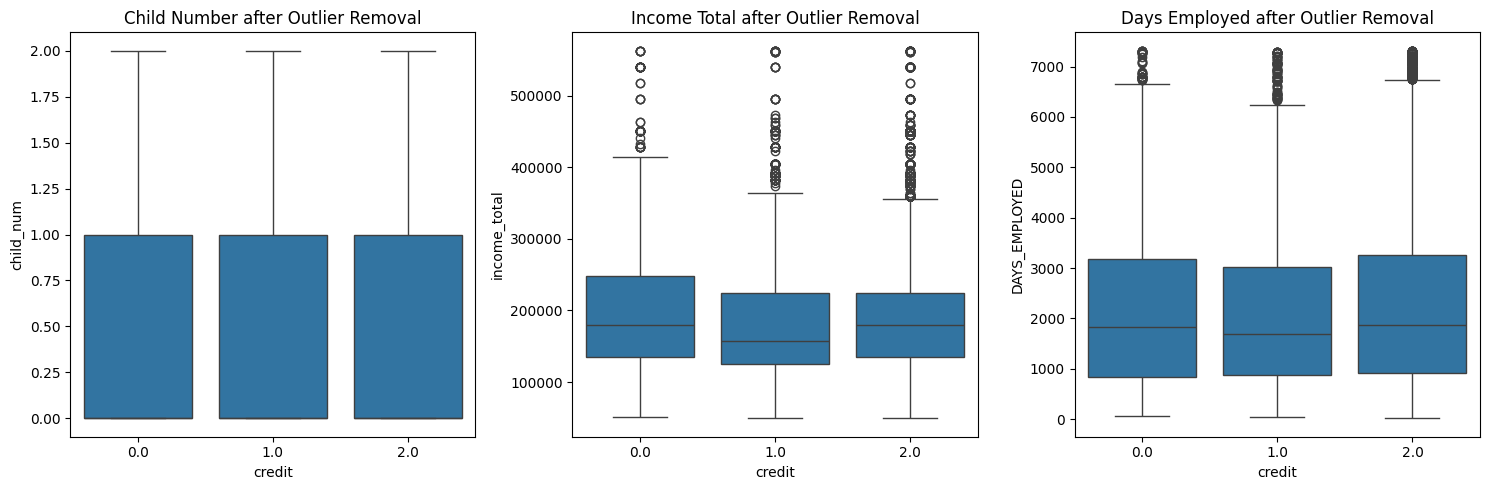

In [ ]:
import numpy as np

# 자녀 수, 수입, 고용 날짜 이상치 처리 및 시각화

# IQR 기반 이상치 제거 함수
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# 자녀 수 이상치 처리
df = remove_outliers_iqr(df, 'child_num')

# 수입 이상치 처리 (log 변환 후 IQR 적용)
df['income_total_log'] = np.log1p(df['income_total']) # 로그 변환
df = remove_outliers_iqr(df, 'income_total_log')
df['income_total'] = np.expm1(df['income_total_log']) # 역변환
df = df.drop('income_total_log', axis=1)

# 고용 날짜 이상치 처리 (극단값 제거) - 0값도 제거
df = df[df['DAYS_EMPLOYED'] != 365243] # 극단치 제거
df = remove_outliers_iqr(df, 'DAYS_EMPLOYED')

# 시각화
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='credit', y='child_num', data=df)
plt.title('Child Number after Outlier Removal')

plt.subplot(1, 3, 2)
sns.boxplot(x='credit', y='income_total', data=df)
plt.title('Income Total after Outlier Removal')

plt.subplot(1, 3, 3)
sns.boxplot(x='credit', y='DAYS_EMPLOYED', data=df)
plt.title('Days Employed after Outlier Removal')


plt.tight_layout()
plt.show()

## 인사이트

- **여성 데이터가 많다**: 성별에 따른 신용 분포의 countplot을 통해 확인할 수 있습니다.
  
- **전체적으로 신용 2등급 비율이 높다**: 신용 등급 분포의 countplot에서 확인되었습니다.

- **남자가 집을 가진 경우 신용 2등급인 비율이 높다**: 성별과 주택 소유 여부에 따른 countplot을 통해 확인할 수 있습니다.

- **고졸 비율이 가장 높다**: 교육 수준에 따른 신용 등급의 countplot에서 확인되었습니다.

- **결혼한 사람들이 많다**: 결혼 상태에 따른 신용 등급의 countplot을 통해 확인할 수 있습니다.

- **집이나 아파트를 소유한 사람들이 많다**: 주거 형태에 따른 신용 등급의 countplot에서 확인되었습니다.

- **자식 숫자의 이상치가 존재한다**: 자녀 수에 대한 boxplot에서 이상치를 확인할 수 있습니다.

- **수입에 이상치가 존재한다**: 연간 소득에 대한 boxplot을 통해 이상치를 확인하였습니다.

- **고용 날짜에 극단적 이상치가 존재한다**: 근무 시작일에 대한 boxplot에서 확인할 수 있습니다.


# 데이터 전처리

1. **불필요한 컬럼 제거**:
   - 'occyp_type'과 'index' 컬럼을 삭제하여 분석에 필요 없는 정보를 제거합니다.

2. **범주형 변수 전처리**:
   - 성별, 차량 소유 여부, 부동산 소유 여부를 0과 1로 변환하여 이진형 변수로 처리합니다.
     - `gender`: 'F'를 0, 'M'을 1로 변환
     - `car`: 'N'을 0, 'Y'를 1로 변환
     - `reality`: 'N'을 0, 'Y'를 1로 변환

3. **수입 컬럼 로그 변환**:
   - 'income_total' 컬럼에 로그 변환을 적용하여 비대칭 분포를 개선합니다.
   - 로그 변환 후 이상치를 제거하고, 원래 값으로 역변환합니다.

4. **정수형 변환**:
   - 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'family_size', 'credit' 컬럼을 정수형으로 변환합니다.
   - 변환 시, 각 컬럼이 존재하는지 확인하고, 변환이 불가능한 경우 경고 메시지를 출력합니다.

5. **원-핫 인코딩**:
   - 'income_type', 'edu_type', 'family_type', 'house_type'과 같은 범주형 변수에 대해 원-핫 인코딩을 수행합니다.

6. **종속 변수 확인**:
   - 'credit' 컬럼의 값 분포를 확인하여 비율이 2가 많은 것을 확인하였으나, 모델링에 그대로 사용하기로 결정합니다.


In [ ]:
# 모델링을 위한 데이터 셋 생성
# 극단값이 존재하는 컬럼이 있어 정규화, 표준화를 실행해볼 필요

# 데이터 불러오기
df = pd.read_csv(file_path)

# 'occyp_type', 'index' 컬럼 삭제
df.drop(['occyp_type', 'index'], axis=1, inplace=True)

# 범주값이 2개인 변수 전처리
df['gender'] = df['gender'].replace(['F','M'], [0,  1])
df['car'] = df['car'].replace(['N','Y'], [0,  1])
df['reality'] = df['reality'].replace(['N','Y'], [0,  1])

# 수입 컬럼 로그화
df['income_total_log'] = np.log1p(df['income_total']) # 로그 변환
df = remove_outliers_iqr(df, 'income_total_log')
df['income_total'] = np.expm1(df['income_total_log']) # 역변환
df = df.drop('income_total_log', axis=1)

# 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'family_size', 'credit' 컬럼을 정수형으로 변환합니다.
float_columns = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'family_size', 'credit']

for col in float_columns:
  if col in df.columns:  # 컬럼이 존재하는지 확인
    try:
        df[col] = df[col].astype(int)
    except (ValueError, TypeError):
        print(f"Warning: Could not convert column '{col}' to integer type. Check for non-numeric values.")

# 범주형 변수 원-핫 인코딩
categorical_cols = ['income_type', 'edu_type', 'family_type', 'house_type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

<ipython-input-14-e0525811909d>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(['F','M'], [0,  1])
<ipython-input-14-e0525811909d>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['car'] = df['car'].replace(['N','Y'], [0,  1])
<ipython-input-14-e0525811909d>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26030 entries, 0 to 26456
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   gender                                  26030 non-null  int64
 1   car                                     26030 non-null  int64
 2   reality                                 26030 non-null  int64
 3   child_num                               26030 non-null  int64
 4   income_total                            26030 non-null  int64
 5   DAYS_BIRTH                              26030 non-null  int64
 6   DAYS_EMPLOYED                           26030 non-null  int64
 7   FLAG_MOBIL                              26030 non-null  int64
 8   work_phone                              26030 non-null  int64
 9   phone                                   26030 non-null  int64
 10  email                                   26030 non-null  int64
 11  family_size         

In [ ]:
df.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,...,edu_type_Secondary / secondary special,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0,0,0,0,202499,-13899,-4709,1,0,0,...,False,True,False,False,False,False,True,False,False,False
1,0,0,1,1,247499,-11380,-1540,1,0,0,...,True,False,False,False,False,True,False,False,False,False
2,1,1,1,0,449999,-19087,-4434,1,0,1,...,False,True,False,False,False,True,False,False,False,False
3,0,0,1,0,202499,-15088,-2092,1,0,1,...,True,True,False,False,False,True,False,False,False,False
4,0,1,1,0,157500,-15037,-2105,1,0,0,...,False,True,False,False,False,True,False,False,False,False


# 모델링

1. **모델 선택**:
   - 다양한 분류 모델을 사용하여 신용카드 사용자 연체 예측 문제를 해결하기 위해 여러 모델을 고려하였습니다.
   - 선정한 모델:
     - Random Forest
     - LightGBM
     - XGBoost (Best 모델로 선정)
     - Extra Trees

2. **데이터 분할**:
   - 전체 데이터셋을 학습 세트와 테스트 세트로 나누었습니다.
   - 비율을 유지하기 위해 stratified 방식으로 80%의 데이터를 학습 세트로, 20%의 데이터를 테스트 세트로 분할하였습니다.

3. **모델 학습 및 평가**:
   - 각 모델을 학습시키고, 테스트 세트에서 예측을 수행하여 성능을 평가하였습니다.
   - 주요 평가지표:
     - Accuracy
     - Log Loss
     - Confusion Matrix
   - 각 모델의 성능을 비교하여 log loss 기준으로 최적 모델을 선정하였습니다.

4. **최적 모델 찾기**:
   - XGBoost 모델이 log loss 기준으로 가장 우수한 성능을 보였습니다.
   - Log Loss: 0.7356으로 확인되었습니다.

5. **하이퍼파라미터 튜닝**:
   - RandomizedSearchCV를 사용하여 XGBoost 모델의 하이퍼파라미터를 최적화하였습니다.
   - 최적의 하이퍼파라미터를 찾고, 해당 모델을 평가하였습니다.
   - 최종 모델의 Accuracy Score: 0.7245, Log Loss: 0.7147로 확인되었습니다.

## 주요 사실
- XGBoost 모델이 다른 모델들에 비해 가장 낮은 log loss 값을 기록하며, 최적의 모델로 선정되었습니다.
- 모델링 과정에서 RandomizedSearchCV를 통해 하이퍼파라미터 튜닝을 수행하여 성능을 개선하였습니다.
- 평가 지표로는 Accuracy와 Log Loss를 사용하여 모델의 성능을 다각적으로 분석하였습니다.


In [ ]:
# 종속변수 비율이 2가 많지만 기술 활용보다는 그대로 모델링 하는 것이 학습에 적절하다고 판단
df['credit'].value_counts()

,count
credit,
2,16682
1,6182
0,3166


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,  ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict, GridSearchCV, cross_val_score
from lightgbm import LGBMClassifier
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# XGBClassifier Best 모델로 선정

# 모델 리스트 (logloss 평가 기준 추가)
models = {
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "LightGBM": LGBMClassifier(class_weight="balanced", random_state=42, verbose=-1),
    "XGBoost": XGBClassifier(objective='multi:softprob', eval_metric="logloss", random_state=42), #objective 추가
    "Extra Trees": ExtraTreesClassifier(class_weight="balanced", random_state=42),
}

# 데이터 분할 (df 데이터프레임 사용)
X = df.drop('credit', axis=1)
y = df['credit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rsts = {}
# 학습 및 평가 (logloss 추가)
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    logloss = log_loss(y_test, y_proba) # logloss 계산
    accuracy = accuracy_score(y_test, y_pred)
    cf = confusion_matrix(y_test, y_pred)
    rsts[name] = {'acc': accuracy,
                  'logloss': logloss, # logloss 결과 저장
                  'cf': cf,
                  'model': model,
                  'y_pred': y_pred}
    print(classification_report(y_test, y_pred))
    print(f"Log Loss: {logloss}") # logloss 출력


Random Forest
              precision    recall  f1-score   support

           0       0.44      0.28      0.34       633
           1       0.58      0.51      0.54      1236
           2       0.76      0.85      0.80      3337

    accuracy                           0.70      5206
   macro avg       0.59      0.55      0.56      5206
weighted avg       0.68      0.70      0.68      5206

Log Loss: 0.9194706142019811

LightGBM
              precision    recall  f1-score   support

           0       0.28      0.41      0.33       633
           1       0.54      0.49      0.51      1236
           2       0.76      0.72      0.74      3337

    accuracy                           0.62      5206
   macro avg       0.52      0.54      0.53      5206
weighted avg       0.65      0.62      0.63      5206

Log Loss: 0.910384603621939

XGBoost
              precision    recall  f1-score   support

           0       0.62      0.11      0.19       633
           1       0.72      0.33     

In [ ]:
# 최적 모델 찾기
best_model_name = None
best_log_loss = float('inf')  # Initialize with a value greater than any possible log loss

for model_name, results in rsts.items():
    # Calculate log loss
    current_log_loss = results['logloss']  # Already calculated and stored
    print(f"{model_name} Log Loss: {current_log_loss}")

    if current_log_loss < best_log_loss:
        best_log_loss = current_log_loss
        best_model_name = model_name

print(f"\nBest model based on log loss: {best_model_name} with Log Loss: {best_log_loss}")

# Access the best model
best_model = rsts[best_model_name]['model']

Random Forest Log Loss: 0.9194706142019811
LightGBM Log Loss: 0.910384603621939
XGBoost Log Loss: 0.7355768898344893
Extra Trees Log Loss: 2.707017445613616

Best model based on log loss: XGBoost with Log Loss: 0.7355768898344893


In [ ]:
# pip install xgboost==2.1.3 scikit-learn==1.3.0
# 호환성 문제로 인한 scikit-learn 버전 수정

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 80.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.


In [ ]:
import xgboost as xgb
import sklearn

print("XGBoost version:", xgb.__version__)
print("Scikit-learn version:", sklearn.__version__)

XGBoost version: 2.1.1
Scikit-learn version: 1.3.0


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, log_loss

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7, 10],  # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],  # Proportion of samples to be used for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Proportion of features to be used for each tree
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition
}

# Create RandomizedSearchCV object for XGBoost
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, objective='multi:softprob', eval_metric='mlogloss', random_state=42),
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='neg_log_loss',  # Use neg_log_loss for evaluation
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Increase verbosity for more output
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)  # for log loss
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

# Calculate and print the Log Loss
current_log_loss = log_loss(y_test, y_prob)
print(f"Log Loss: {current_log_loss}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}
              precision    recall  f1-score   support

           0       0.70      0.12      0.21       633
           1       0.75      0.37      0.49      1236
           2       0.72      0.97      0.83      3337

    accuracy                           0.72      5206
   macro avg       0.72      0.49      0.51      5206
weighted avg       0.73      0.72      0.67      5206

Accuracy Score: 0.7245485977718018
Log Loss: 0.71467567437367


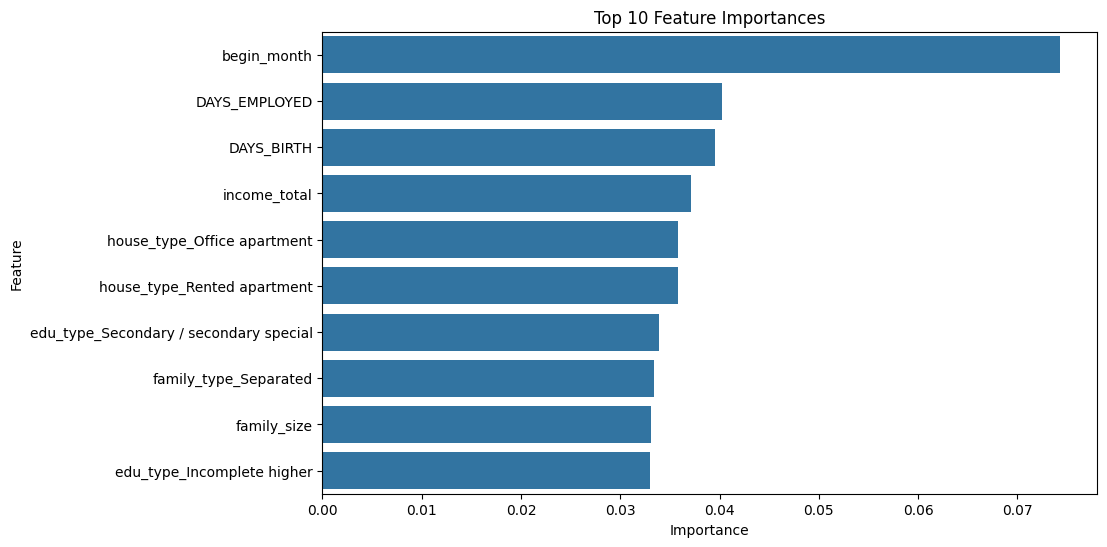

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best model
feature_importances = best_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = feature_importance_df.head(10)

# Visualize feature importances using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
import joblib

# Assuming 'best_model' is your trained XGBClassifier model
# Save the model to a file
joblib.dump(best_model, '/content/drive/MyDrive/best_model.joblib')

['/content/drive/MyDrive/best_model.joblib']

In [ ]:
try:
    loaded_model = joblib.load('/content/drive/MyDrive/best_model.joblib')
    print("Model loaded successfully!")
    # Now you can use the loaded_model for predictions
    # Example:
    # predictions = loaded_model.predict(new_data)
except FileNotFoundError:
    print("Error: Model file not found. Please ensure the file exists at the specified path.")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")

Model loaded successfully!


# XAI: SHAP와 모델 해석

1. **SHAP 값 계산**:
   - TreeExplainer를 사용하여 모델의 SHAP 값을 계산합니다.
   - 학습 세트와 테스트 세트에서의 SHAP 값을 각각 계산합니다.

2. **특정 클래스에 대한 SHAP 값 선택**:
   - 클래스 인덱스 0, 1, 2에 대해 SHAP 값을 선택하여 데이터프레임으로 변환합니다.

3. **SHAP 값의 해석**:
   - SHAP 값은 각 특성이 모델 예측에 미치는 영향을 나타냅니다.
   - 특정 개체의 SHAP 값을 더해 기본 예측값에 추가하여 최종 예측값을 계산하는 공식이 사용됩니다.

4. **SHAP 시각화**:
   - SHAP summary plot, bar plot, dependence plot, force plot 등을 생성하여 각 클래스의 SHAP 값을 시각화합니다.
   - 이 시각화는 각 특성이 모델 예측에 미치는 영향을 직관적으로 보여줍니다.

5. **SHAP 피처 중요도 계산**:
   - 각 클래스에 대해 SHAP 값의 평균 절대값을 계산하여 피처의 중요도를 평가합니다.
   - 중요도가 0보다 큰 특성을 선택하여 결과를 저장합니다.

6. **모델 예측 비교**:
   - 모든 변수를 사용한 모델과 무의미한 변수를 삭제한 모델의 예측 결과를 비교합니다.
   - 정확도와 로그 손실을 계산하여 두 모델의 성능을 평가합니다.

7. **결과 출력**:
   - 두 모델의 정확도와 로그 손실을 출력합니다.
   - 혼동 행렬을 출력하여 예측 결과를 시각적으로 비교합니다.

8. **변수 개수 확인**:
   - 모든 변수를 사용한 경우와 무의미한 변수를 삭제한 경우의 변수 개수를 출력합니다.

## 주요 인사이트
- **주요 특성 식별**: SHAP 분석을 통해 모델의 예측에 가장 큰 영향을 미치는 변수를 파악할 수 있습니다. 예를 들어, `begin_month`, `DAYS_BIRTH`, `income_total` 등이 높은 중요도를 보였습니다.
- **예측의 투명성**: SHAP 값을 통해 각 특성이 예측에 미치는 긍정적 또는 부정적 영향을 명확히 이해할 수 있어, 모델의 결과를 해석하고 신뢰성을 높이는 데 기여합니다.
- **클래스 간 차별화**: 각 클래스에 대한 SHAP 값의 차이를 분석하면, 특정 클래스(예: 신용 등급)에 따라 어떤 특성이 더 중요한지를 파악할 수 있습니다.

## 향후 진행 방향
1. **특성 선택 및 모델 개선**: SHAP 분석 결과를 바탕으로 중요도가 낮은 특성을 제거하여 모델의 복잡성을 줄이고, 성능을 개선할 수 있는 방법을 모색합니다.
2. **모델 성능 평가**: SHAP 값을 활용하여 모델의 예측 결과를 정기적으로 평가하고, 비즈니스 요구 사항에 맞게 모델을 업데이트합니다.





In [ ]:
import os
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
!pip install SHAP

In [ ]:
import shap

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

# Google Drive 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV 파일 경로 (Google Drive 내 파일 경로로 변경)
file_path = '/content/drive/MyDrive/메타코드_M/train.csv'  # 자신의 파일 경로로 수정


# Pandas를 사용하여 CSV 파일 읽기
df = pd.read_csv(file_path)

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [ ]:
# 모델링을 위한 데이터 셋 생성
# 극단값이 존재하는 컬럼이 있어 정규화, 표준화를 실행해볼 필요

# 데이터 불러오기
df = pd.read_csv(file_path)

# 'occyp_type', 'index' 컬럼 삭제
df.drop(['occyp_type', 'index'], axis=1, inplace=True)

# 범주값이 2개인 변수 전처리
df['gender'] = df['gender'].replace(['F','M'], [0,  1])
df['car'] = df['car'].replace(['N','Y'], [0,  1])
df['reality'] = df['reality'].replace(['N','Y'], [0,  1])

# 수입 컬럼 로그화
df['income_total_log'] = np.log1p(df['income_total']) # 로그 변환
df = remove_outliers_iqr(df, 'income_total_log')
df['income_total'] = np.expm1(df['income_total_log']) # 역변환
df = df.drop('income_total_log', axis=1)

# 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'family_size', 'credit' 컬럼을 정수형으로 변환합니다.
float_columns = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'family_size', 'credit']

for col in float_columns:
  if col in df.columns:  # 컬럼이 존재하는지 확인
    try:
        df[col] = df[col].astype(int)
    except (ValueError, TypeError):
        print(f"Warning: Could not convert column '{col}' to integer type. Check for non-numeric values.")

# 범주형 변수 원-핫 인코딩
categorical_cols = ['income_type', 'edu_type', 'family_type', 'house_type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

<ipython-input-11-e0525811909d>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(['F','M'], [0,  1])
<ipython-input-11-e0525811909d>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['car'] = df['car'].replace(['N','Y'], [0,  1])
<ipython-input-11-e0525811909d>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26030 entries, 0 to 26456
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   gender                                  26030 non-null  int64
 1   car                                     26030 non-null  int64
 2   reality                                 26030 non-null  int64
 3   child_num                               26030 non-null  int64
 4   income_total                            26030 non-null  int64
 5   DAYS_BIRTH                              26030 non-null  int64
 6   DAYS_EMPLOYED                           26030 non-null  int64
 7   FLAG_MOBIL                              26030 non-null  int64
 8   work_phone                              26030 non-null  int64
 9   phone                                   26030 non-null  int64
 10  email                                   26030 non-null  int64
 11  family_size         

In [ ]:
df.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,...,edu_type_Secondary / secondary special,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0,0,0,0,202500,-13899,-4709,1,0,0,...,False,True,False,False,False,False,True,False,False,False
1,0,0,1,1,247500,-11380,-1540,1,0,0,...,True,False,False,False,False,True,False,False,False,False
2,1,1,1,0,449999,-19087,-4434,1,0,1,...,False,True,False,False,False,True,False,False,False,False
3,0,0,1,0,202500,-15088,-2092,1,0,1,...,True,True,False,False,False,True,False,False,False,False
4,0,1,1,0,157500,-15037,-2105,1,0,0,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
import joblib

try:
    loaded_model = joblib.load('/content/drive/MyDrive/메타코드_M/best_model.joblib')
    print("Model loaded successfully!")
    # Now you can use the loaded_model for predictions
    # Example:
    # predictions = loaded_model.predict(new_data)
except FileNotFoundError:
    print("Error: Model file not found. Please ensure the file exists at the specified path.")
except Exception as e:
    print(f"An error occurred while loading the model: {e}")

Model loaded successfully!


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:48:46] WARNING: /workspace/src/collective/../data/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Calculate SHAP values
explainer = shap.TreeExplainer(loaded_model)

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 분할 (df 데이터프레임 사용)
X = df.drop('credit', axis=1)
y = df['credit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 트레인 셋에서의 SHAP value
shap_values_train = explainer.shap_values(X_train)

# 테스트 셋에서의 SHAP value
shap_values_test = explainer.shap_values(X_test)

In [ ]:
print(shap_values_train.shape)  # SHAP 값의 형태 출력

(20824, 30, 3)


In [ ]:
# 첫 번째 클래스(클래스 인덱스 0)에 대한 SHAP 값 선택
class_index = 0  # 예: 첫 번째 클래스
df_shap_train = pd.DataFrame(shap_values_train[:, :, class_index], columns=X_train.columns)
df_shap_test = pd.DataFrame(shap_values_test[:, :, class_index], columns=X_test.columns)

In [ ]:
# 열 절대값 합의 평균 = 변수의 모델 기여도
# 특정 개체의 SHAP 값을 더해 기본 예측값에 추가하면, 해당 개체의 최종 예측값
# 예측값 = 기본 예측값+∑SHAP 값
df_shap_train

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,...,edu_type_Secondary / secondary special,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,-0.010874,-0.021827,-0.006948,0.035713,-0.052644,-0.325886,0.048945,0.0,-0.002320,-0.051264,...,0.005517,-0.016442,-0.004674,-0.013829,-0.018121,0.004559,-0.000398,-0.000678,0.000699,-0.002087
1,0.014819,-0.031707,0.027358,0.034761,0.053797,-0.003145,-0.016225,0.0,-0.007107,-0.002509,...,0.003280,-0.087495,-0.000279,0.000349,0.002134,0.005719,0.000143,-0.001118,0.001944,-0.005867
2,-0.029985,-0.010455,-0.000086,-0.001131,-0.239057,0.023198,-0.170076,0.0,0.010563,-0.050244,...,0.003414,0.008099,-0.001988,0.003102,0.000018,0.002815,-0.006469,-0.000257,0.002286,-0.004762
3,0.000469,-0.030859,-0.000618,-0.101173,-0.041735,-0.030509,-0.071553,0.0,-0.003165,-0.019158,...,-0.009974,0.007221,-0.003588,-0.004917,0.000059,-0.031296,-0.004762,-0.000131,-0.000791,0.033617
4,0.037915,0.010857,-0.011615,0.034557,0.080576,0.120619,0.202479,0.0,-0.012251,-0.033626,...,-0.002783,0.006978,0.001899,-0.018979,0.000622,0.008417,0.000737,-0.000580,0.000835,-0.001951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20819,-0.003251,-0.007078,0.009888,0.034260,0.029277,-0.229295,0.167302,0.0,0.005750,-0.008388,...,0.000519,-0.006329,0.000551,-0.012768,0.000373,0.002414,-0.001766,-0.001569,-0.000201,-0.002597
20820,-0.003684,-0.041529,0.005835,-0.071190,0.175392,0.156246,-0.051852,0.0,-0.007649,-0.038551,...,-0.005090,0.027176,-0.001239,-0.003859,0.000290,0.000785,-0.004881,-0.000583,0.000151,-0.003368
20821,0.005120,0.009806,0.015956,0.149634,0.016736,0.106936,0.018693,0.0,-0.004818,-0.011012,...,-0.008504,0.016798,-0.003782,0.009094,0.004571,0.012261,-0.003728,-0.000598,0.003012,-0.001833
20822,-0.044945,-0.002380,-0.016203,-0.119518,-0.107184,0.045554,0.155951,0.0,-0.017167,-0.013192,...,-0.034307,-0.061206,-0.001752,0.009300,0.000232,0.003971,-0.002481,-0.000506,-0.001542,-0.002899


In [ ]:
# 두 번째 클래스(클래스 인덱스 1)에 대한 SHAP 값 선택
class_index = 1  # 예: 두 번째 클래스
df_shap_train = pd.DataFrame(shap_values_train[:, :, class_index], columns=X_train.columns)
df_shap_test = pd.DataFrame(shap_values_test[:, :, class_index], columns=X_test.columns)

In [ ]:
df_shap_train

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,...,edu_type_Secondary / secondary special,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0.004125,0.060205,0.016845,-0.009215,-0.046396,-0.097582,-0.034444,0.0,0.000230,-0.011086,...,-0.008610,0.031237,0.004210,0.005398,0.060421,0.001838,0.001448,-0.000604,-0.007948,0.003794
1,-0.032999,-0.011761,-0.087431,-0.000361,0.003396,0.059162,-0.035713,0.0,-0.003720,0.010231,...,-0.012597,-0.000463,-0.001186,-0.008528,-0.012657,-0.014795,-0.001009,-0.001236,-0.003057,0.002513
2,0.004534,-0.006186,-0.026640,0.019307,-0.061384,-0.237726,-0.013055,0.0,-0.006328,0.020369,...,-0.037267,-0.037842,0.004184,-0.005288,-0.005375,0.000342,0.000461,-0.001272,-0.002899,0.002598
3,-0.014635,-0.018820,0.006936,-0.037939,-0.050611,-0.012856,-0.029525,0.0,-0.007423,-0.004086,...,0.023495,-0.024381,-0.004018,-0.009056,-0.005166,-0.003178,-0.007361,-0.000567,-0.008907,-0.186197
4,-0.046802,0.004705,0.055684,-0.010779,-0.021920,-0.184019,-0.040248,0.0,-0.006511,-0.012613,...,-0.031160,0.025155,0.002430,-0.006451,-0.004350,-0.000201,0.002188,-0.001038,-0.002537,-0.000296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20819,-0.012602,-0.023398,-0.149077,-0.004959,-0.105578,-0.091604,-0.181716,0.0,0.062635,-0.040737,...,-0.018065,-0.016163,0.002929,-0.005394,-0.006215,-0.000669,-0.006404,-0.005985,-0.002451,0.005574
20820,0.001993,0.022117,0.000862,0.063343,-0.103236,-0.235070,0.142798,0.0,-0.011239,0.008486,...,-0.023450,-0.031121,-0.000990,-0.006722,-0.001162,-0.001595,0.000675,-0.001450,-0.000073,0.001688
20821,-0.019173,0.017452,0.069163,0.012469,0.023918,0.002792,0.175543,0.0,0.026810,0.015060,...,-0.027828,0.009662,0.001289,0.003313,-0.002058,-0.001231,0.000490,-0.000527,-0.004482,0.000429
20822,0.018205,-0.001054,0.012828,-0.008221,0.039461,-0.091207,-0.151213,0.0,-0.029983,0.007490,...,0.057480,-0.091414,0.003162,0.002546,-0.002480,-0.003430,0.000076,-0.001474,-0.003448,0.000698


In [ ]:
# 세 번째 클래스(클래스 인덱스 2)에 대한 SHAP 값 선택
class_index = 2  # 예: 세 번째 클래스
df_shap_train = pd.DataFrame(shap_values_train[:, :, class_index], columns=X_train.columns)
df_shap_test = pd.DataFrame(shap_values_test[:, :, class_index], columns=X_test.columns)

In [ ]:
df_shap_train

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,...,edu_type_Secondary / secondary special,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,-0.003619,-0.036479,-0.009130,-0.010539,0.020570,0.115794,-0.057121,0.0,-0.002549,0.010102,...,0.001793,-0.032987,-0.006468,-0.006190,-0.028445,-0.004222,-0.004697,0.000838,0.002582,-0.002778
1,0.015742,-0.011286,0.041099,-0.008604,-0.001162,-0.080732,0.032302,0.0,0.018704,-0.009124,...,0.017920,-0.004529,-0.005130,-0.002787,0.001697,0.002966,-0.003065,0.001674,0.001171,-0.000992
2,0.040519,0.006351,-0.014399,-0.008210,0.114261,0.197578,0.013641,0.0,-0.000282,0.011090,...,0.009044,0.032395,-0.004734,-0.000499,-0.000269,-0.002762,-0.001742,0.000496,0.002629,-0.000406
3,-0.014566,0.016376,0.007542,0.092970,0.067454,-0.014200,-0.009464,0.0,0.000975,0.003869,...,0.023419,0.038422,-0.004946,-0.000934,0.001051,0.038585,-0.000450,-0.000157,0.004238,0.059755
4,0.102356,0.011335,-0.032779,0.006943,0.127978,0.222335,-0.048097,0.0,0.029637,-0.000516,...,0.010067,-0.025578,-0.006848,-0.002709,0.002629,-0.000599,-0.003641,0.000433,0.001090,-0.001506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20819,-0.013033,0.001847,0.016552,0.009957,0.063840,0.181879,-0.091258,0.0,-0.068910,0.010037,...,0.008461,0.011647,-0.009191,-0.005394,0.000970,-0.008096,-0.003081,0.000834,0.001224,0.000840
20820,-0.010029,0.006562,0.000814,0.017280,-0.002233,0.039110,-0.018858,0.0,0.014750,0.005537,...,0.010759,0.028275,0.004869,0.000590,-0.001530,-0.001927,-0.003198,0.000778,0.000187,-0.000264
20821,0.006517,0.018232,0.004423,-0.041664,-0.042871,0.027904,-0.138303,0.0,0.013339,-0.004133,...,0.007023,-0.007306,-0.002586,-0.008539,0.004052,-0.001210,-0.001856,0.000702,0.000852,-0.003460
20822,-0.020131,-0.007922,-0.014031,-0.006014,0.056511,0.095769,-0.013202,0.0,0.033194,-0.011270,...,0.023951,0.033228,-0.002651,-0.016053,0.000552,0.006673,-0.000717,0.000027,0.001511,0.000071


In [ ]:
X_train.shape

(20824, 30)

In [ ]:
shap_values_train.shape

(20824, 30, 3)

In [ ]:
# Select a specific row and feature
row_index = 10  # Index of the row
feature_name = "income_total"  # Name of the specific feature

# Loop over each class and print SHAP values
for class_index in range(3):  # 클래스 0, 1, 2
    # Get SHAP value for the selected feature and row for the specified class
    specific_shap_value = shap_values_train[row_index, X_train.columns.get_loc(feature_name), class_index]

    # Get base value for the specified class
    base_value = explainer.expected_value[class_index]  # 클래스에 대한 기대값

    # Print results
    print(f"SHAP value for row {row_index}, feature '{feature_name}' for class {class_index}: {specific_shap_value:.4f}")
    print(f"Base value (expected value) for class {class_index}: {base_value:.4f}")
    print()


SHAP value for row 10, feature 'income_total' for class 0: 0.1930
Base value (expected value) for class 0: -0.3483

SHAP value for row 10, feature 'income_total' for class 1: -0.0656
Base value (expected value) for class 1: 0.2673

SHAP value for row 10, feature 'income_total' for class 2: 0.0062
Base value (expected value) for class 2: 1.2789



In [ ]:
shap_base = explainer.expected_value

In [ ]:
yhat = np.mean(y_train)
print(np.log(yhat/(1-yhat)))
print(yhat)

nan
1.519208605455244


<ipython-input-29-82a656660e6f>:2: RuntimeWarning: invalid value encountered in log
  print(np.log(yhat/(1-yhat)))


In [ ]:
1 / (1 + np.exp(-1*shap_base))

array([], dtype=float64)

In [ ]:
df.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,...,edu_type_Secondary / secondary special,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0,0,0,0,202500,-13899,-4709,1,0,0,...,False,True,False,False,False,False,True,False,False,False
1,0,0,1,1,247500,-11380,-1540,1,0,0,...,True,False,False,False,False,True,False,False,False,False
2,1,1,1,0,449999,-19087,-4434,1,0,1,...,False,True,False,False,False,True,False,False,False,False
3,0,0,1,0,202500,-15088,-2092,1,0,1,...,True,True,False,False,False,True,False,False,False,False
4,0,1,1,0,157500,-15037,-2105,1,0,0,...,False,True,False,False,False,True,False,False,False,False


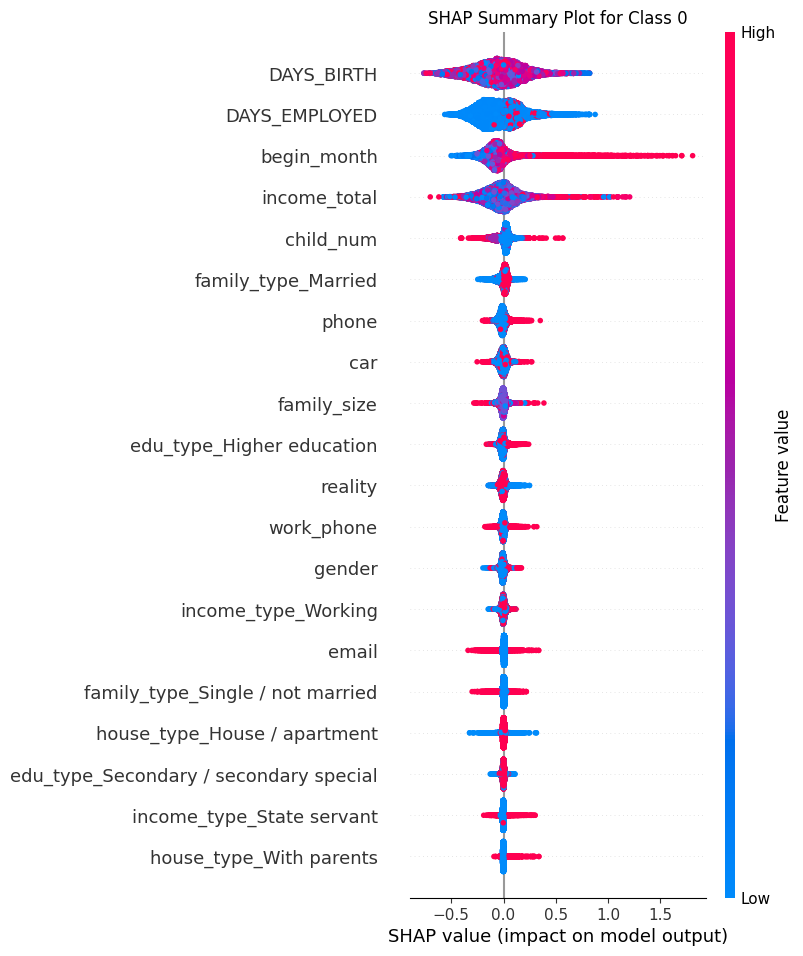

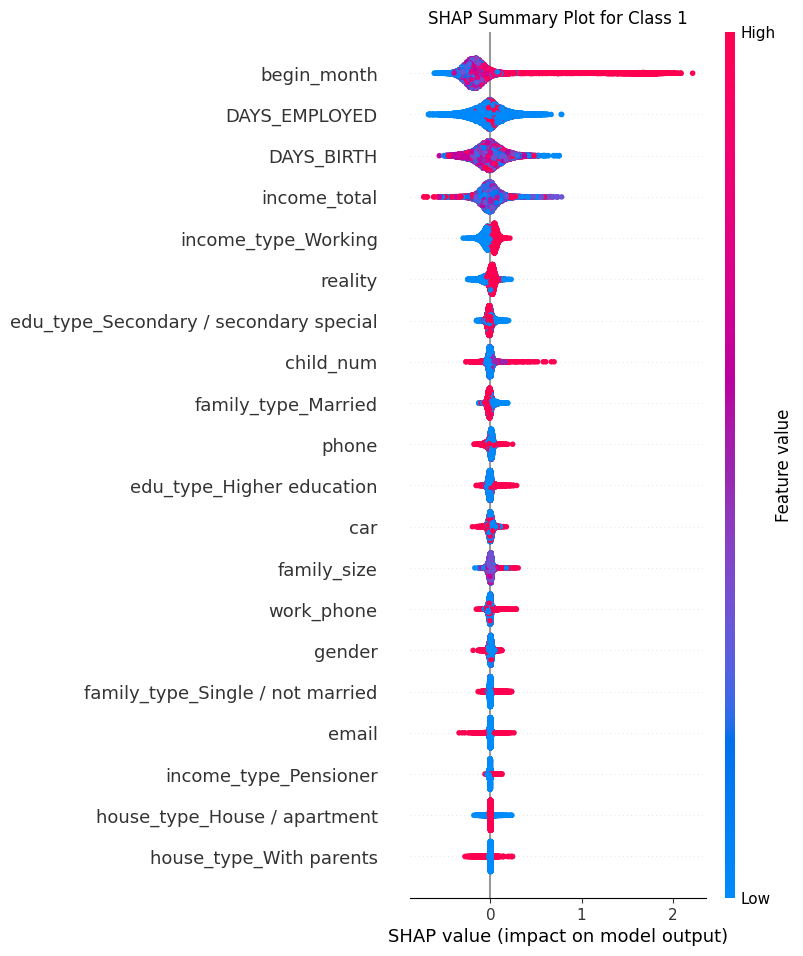

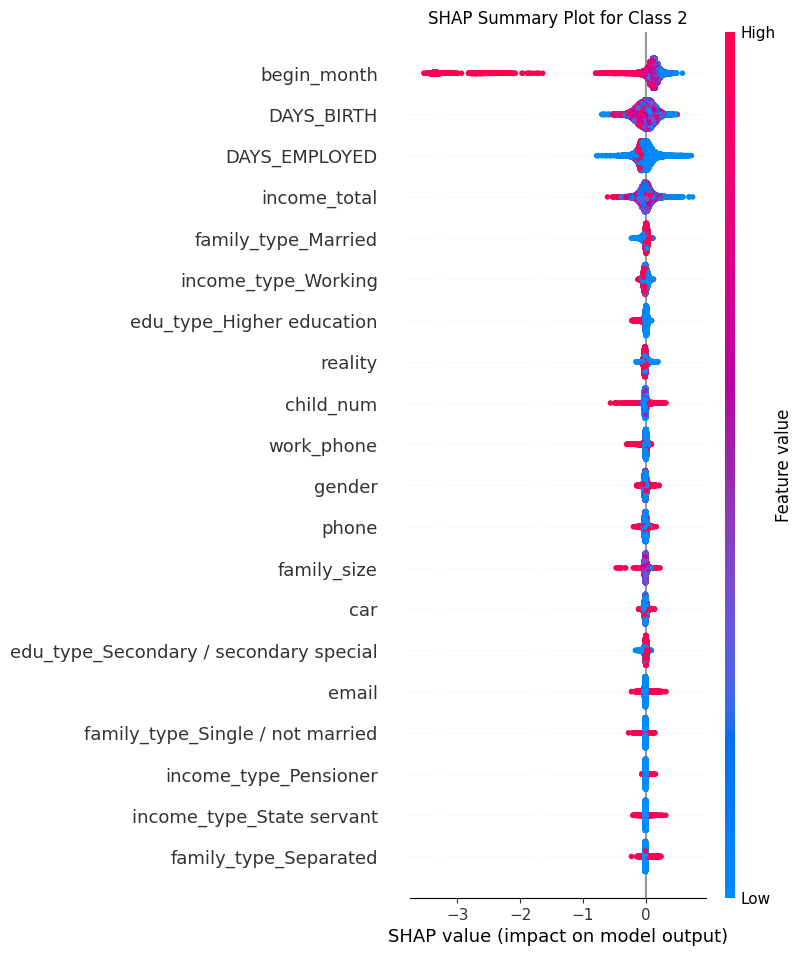

In [ ]:
# Visualize SHAP summary plot
for class_index in range(3):  # 클래스 0, 1, 2
    shap.summary_plot(shap_values_train[:, :, class_index], X_train, feature_names=X_train.columns, show=False)
    plt.title(f'SHAP Summary Plot for Class {class_index}')
    plt.show()

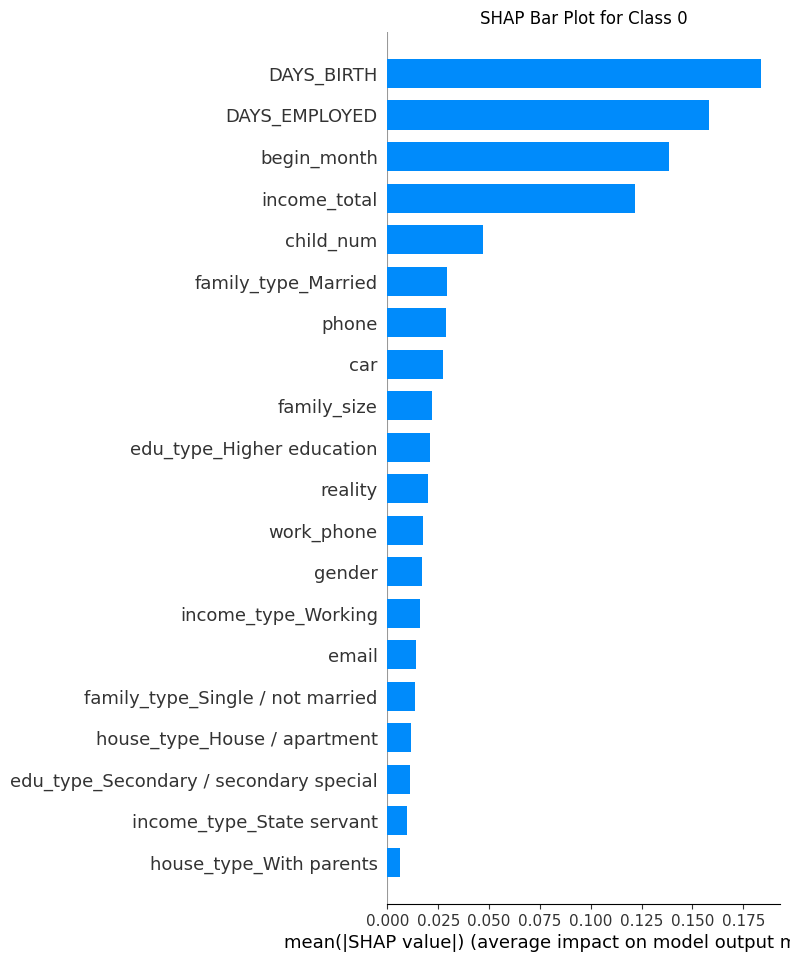

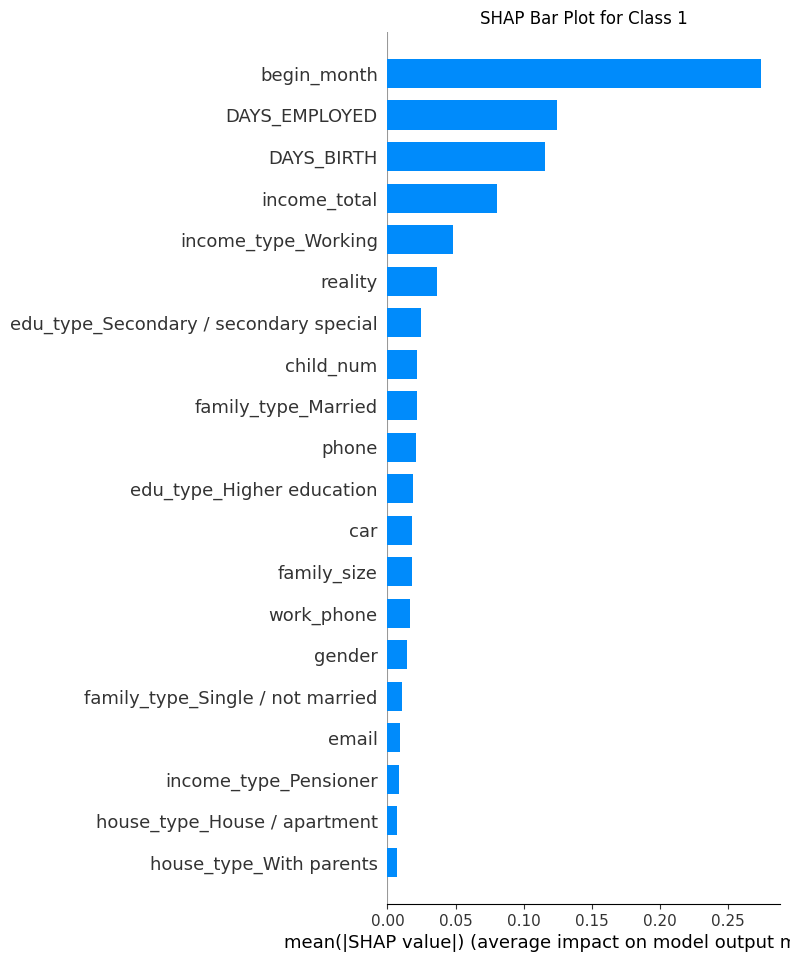

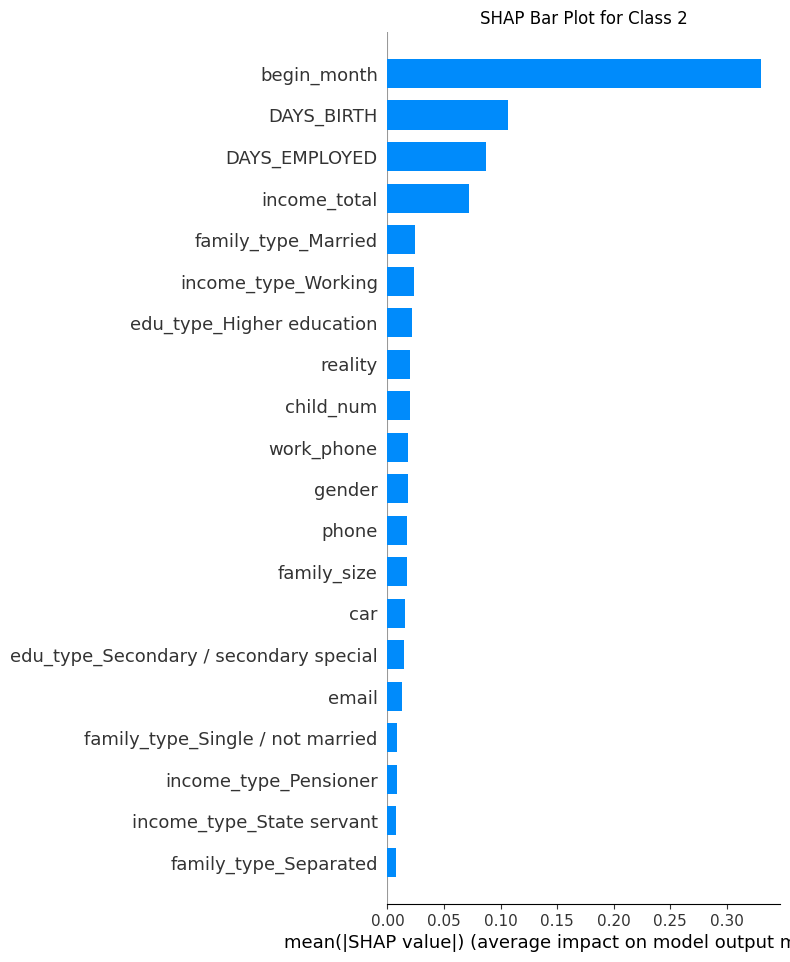

In [ ]:
# Loop over each class and create a bar plot
for class_index in range(3):  # 클래스 0, 1, 2
    shap.summary_plot(shap_values_train[:, :, class_index],
                      X_train,
                      plot_type='bar',
                      feature_names=X_train.columns,
                      show=False)
    plt.title(f'SHAP Bar Plot for Class {class_index}')
    plt.show()

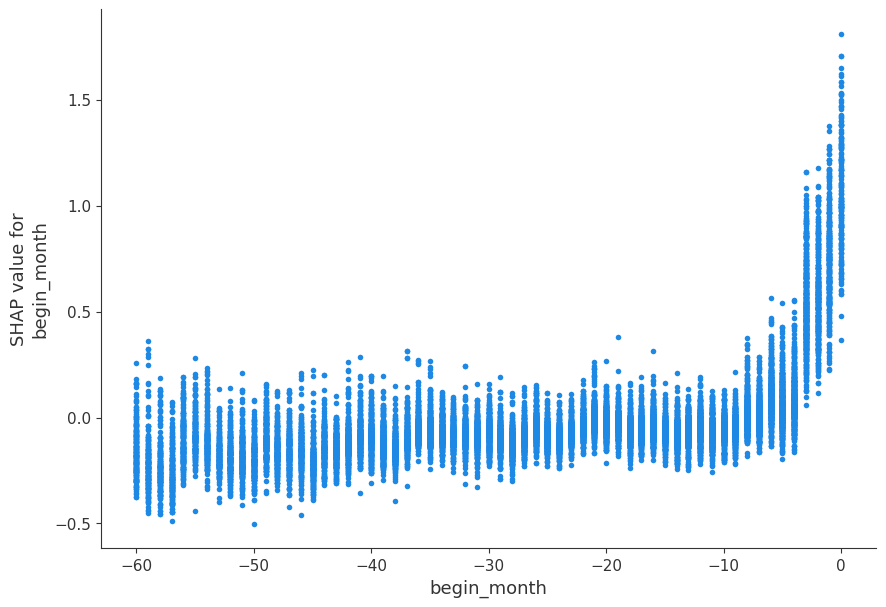

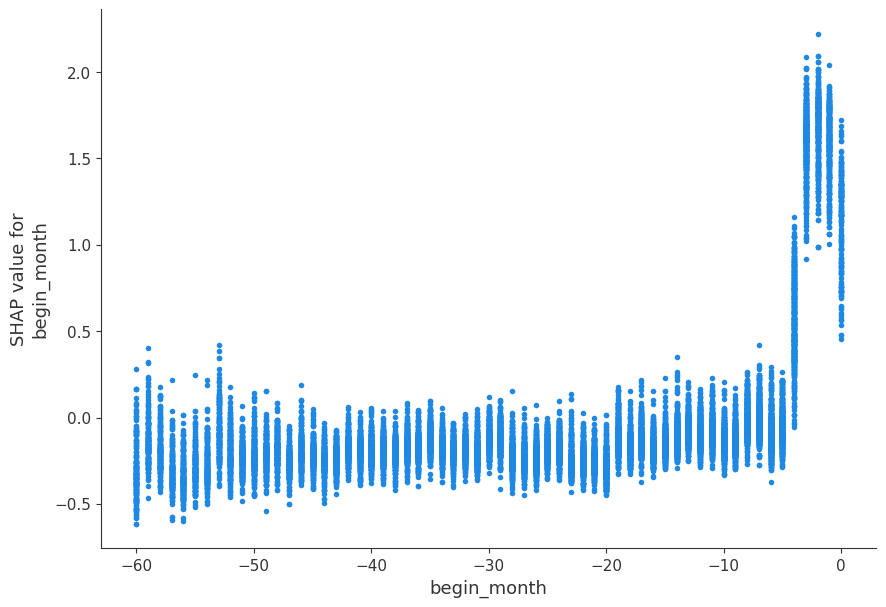

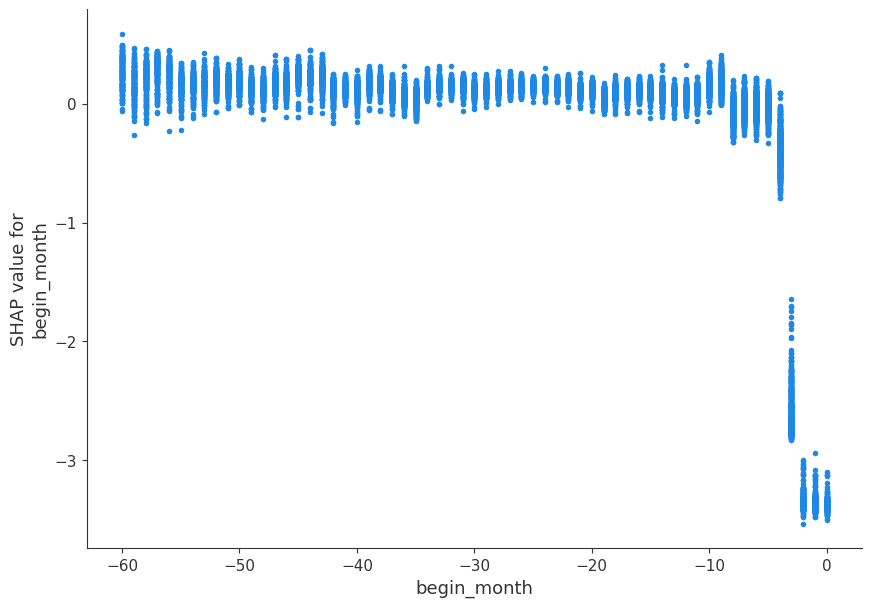

In [ ]:
# Loop over each class and create a dependence plot
for class_index in range(3):  # 클래스 0, 1, 2
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    shap.dependence_plot("begin_month",
                         shap_values_train[:, :, class_index],
                         X_train,
                         interaction_index=None,
                         ax=ax)
    ax.set_title(f'Dependence Plot for Class {class_index}')
    plt.show()

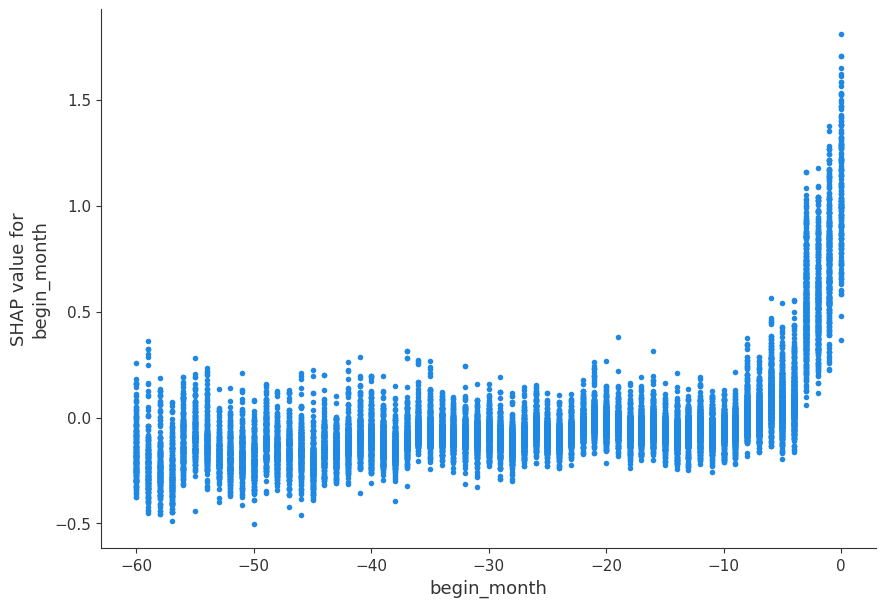

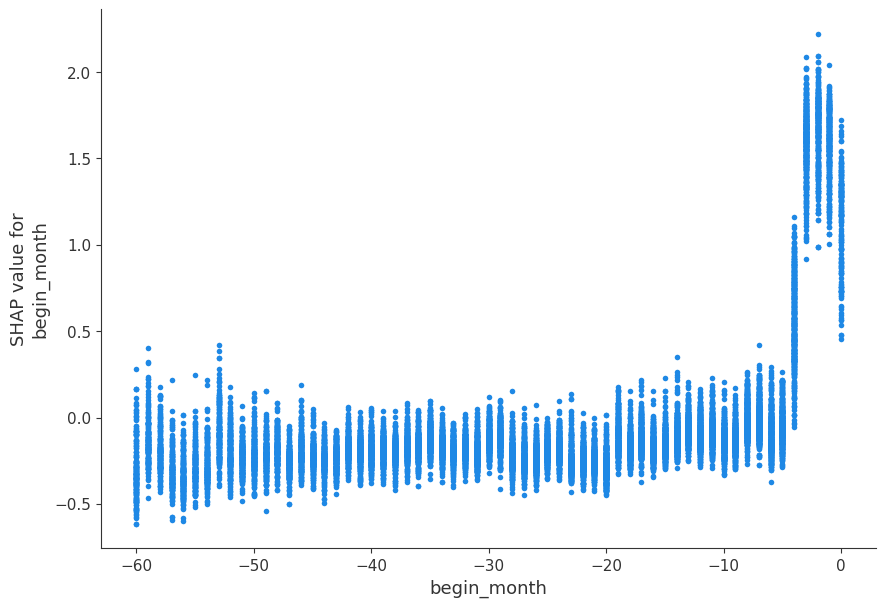

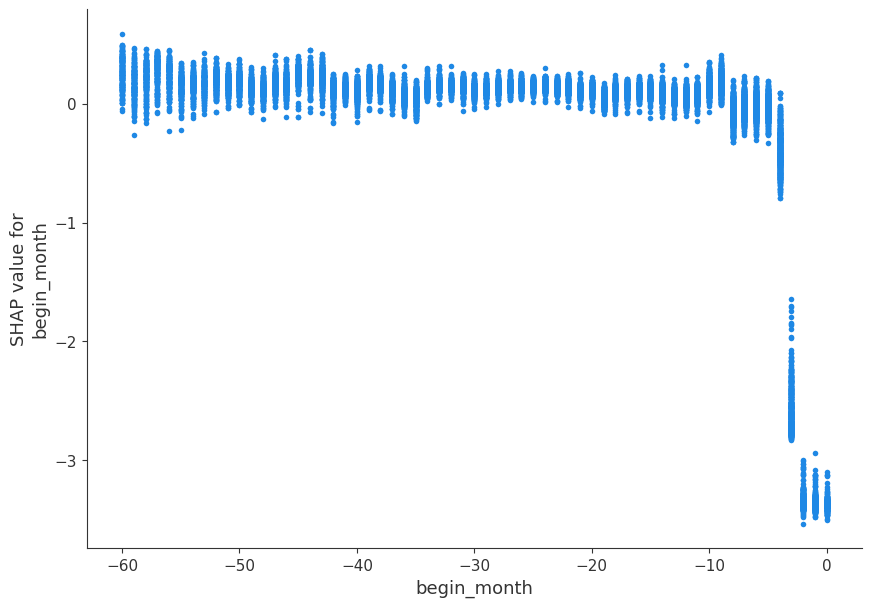

In [ ]:
# Loop over each class and create a dependence plot
for class_index in range(3):  # 클래스 0, 1, 2
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    shap.dependence_plot("begin_month",
                         shap_values_train[:, :, class_index],
                         X_train,
                         interaction_index=None,
                         ax=ax)
    ax.set_title(f'Dependence Plot for Class {class_index} - begin_month')
    plt.show()

In [ ]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir] [--paths] [--json]
               [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: bundlerextension console dejavu execute kernel kernelspec migrate nbclassic
nbconvert nbextension notebook run server serverextension troubleshoot trust

Jupyter command `jupyter-labextension` not found.


<Figure size 1000x500 with 0 Axes>

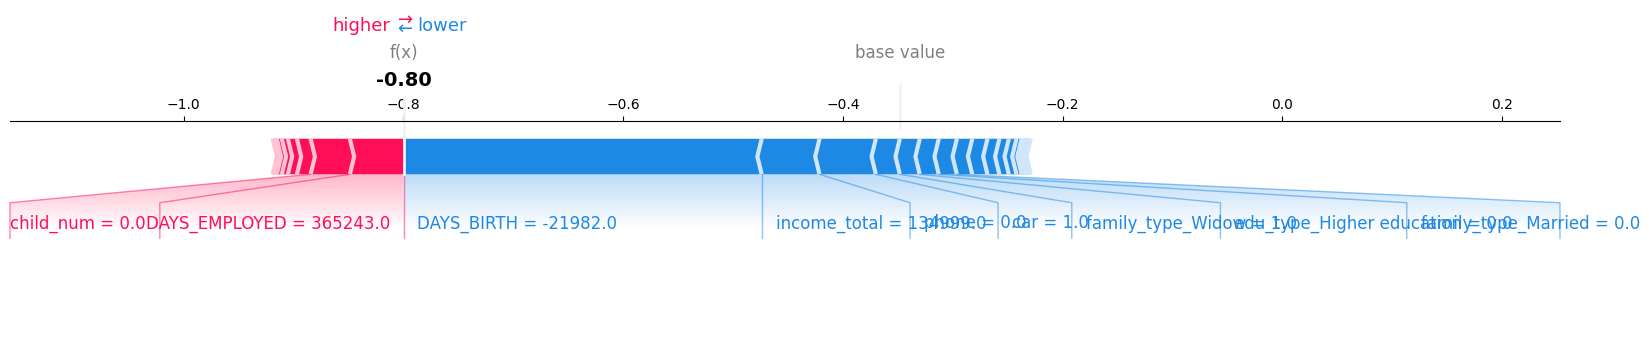

<Figure size 1000x500 with 0 Axes>

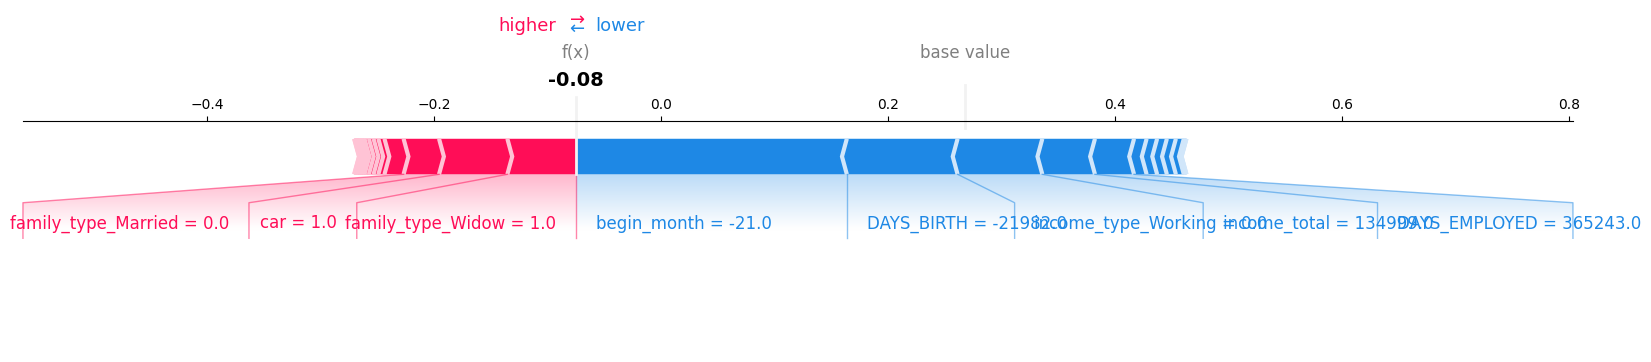

<Figure size 1000x500 with 0 Axes>

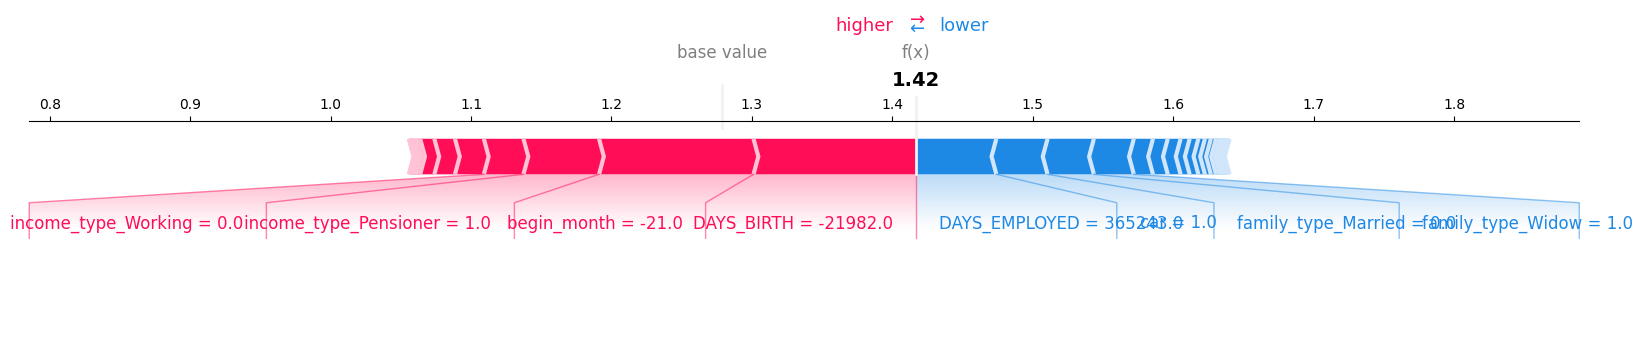

In [ ]:
# Loop over each class and create a force plot for the first sample
for class_index in range(3):  # 클래스 0, 1, 2
    plt.figure(figsize=(10, 5))
    shap.force_plot(explainer.expected_value[class_index],
                    shap_values_train[0, :, class_index],
                    X_train.iloc[0, :],
                    matplotlib=True)
    plt.show()

In [ ]:
# SHAP 피처 중요도 계산
shap_fi_all_classes = {}

for class_index in range(3):  # 클래스 0, 1, 2
    # 각 클래스에 대한 SHAP 값의 평균 절대값 계산
    shap_fi_train = pd.Series(np.mean(np.abs(shap_values_train[:, :, class_index]), axis=0),
                              index=X_train.columns).sort_values(ascending=False)

    # 0보다 큰 특성 선택
    selected_features = shap_fi_train[shap_fi_train > 0].index.tolist()

    # 결과 저장
    shap_fi_all_classes[class_index] = {
        'importance': shap_fi_train,
        'selected_features': selected_features
    }

# 결과 확인
for class_index, results in shap_fi_all_classes.items():
    print(f'Class {class_index} Feature Importance:')
    print(results['importance'])
    print(f'Selected Features for Class {class_index}: {results["selected_features"]}')
    print()

Class 0 Feature Importance:
DAYS_BIRTH                                0.183884
DAYS_EMPLOYED                             0.158237
begin_month                               0.138358
income_total                              0.121823
child_num                                 0.046825
family_type_Married                       0.029493
phone                                     0.028680
car                                       0.027228
family_size                               0.022145
edu_type_Higher education                 0.020750
reality                                   0.019993
work_phone                                0.017515
gender                                    0.016745
income_type_Working                       0.015876
email                                     0.013861
family_type_Single / not married          0.013392
house_type_House / apartment              0.011737
edu_type_Secondary / secondary special    0.010914
income_type_State servant                 0.009712
hou

In [ ]:
X_train.shape

(20824, 30)

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

# SHAP 값의 평균 절대값을 계산하여 각 클래스에서 가장 큰 값을 선택
mean_abs_shap = np.mean(np.abs(shap_values_train), axis=0)  # 각 특성에 대해 평균 절대 SHAP 값 계산
mean_abs_shap_per_class = np.max(mean_abs_shap, axis=1)  # 각 특성에 대해 모든 클래스에서 최대값 선택

# SHAP 값이 0 이상인 변수 선택
shap_selected_features = X_train.columns[mean_abs_shap_per_class > 0]

# 선택된 변수 데이터프레임
X_filtered_train = X_train[shap_selected_features]
X_filtered_test = X_test[shap_selected_features]

# 특성 이름 정렬 (모델이 기대하는 순서로 정렬)
X_filtered_train = X_filtered_train.reindex(columns=loaded_model.get_booster().feature_names)
X_filtered_test = X_filtered_test.reindex(columns=loaded_model.get_booster().feature_names)

# 모든 변수를 사용한 모델 예측
y_pred_full = loaded_model.predict(X_test)
y_pred_prob_full = loaded_model.predict_proba(X_test)

# 무의미한 변수를 삭제한 모델 예측
y_pred_filtered = loaded_model.predict(X_filtered_test)
y_pred_prob_filtered = loaded_model.predict_proba(X_filtered_test)

# 정확도와 로그 손실 계산
accuracy_full = accuracy_score(y_test, y_pred_full)
log_loss_full = log_loss(y_test, y_pred_prob_full)

accuracy_filtered = accuracy_score(y_test, y_pred_filtered)
log_loss_filtered = log_loss(y_test, y_pred_prob_filtered)

# 결과 출력
print(f'모든 변수를 사용한 정확도 : {round(accuracy_full, 4)}')
print(f'무의미한 변수를 삭제한 정확도 : {round(accuracy_filtered, 4)}')
print('-' * 100)
print(f'모든 변수를 사용한 로그 손실 : {round(log_loss_full, 4)}')
print(f'무의미한 변수를 삭제한 로그 손실 : {round(log_loss_filtered, 4)}')
print('-' * 100)

# 혼동 행렬 출력
cf_full = confusion_matrix(y_test, y_pred_full)
cf_filtered = confusion_matrix(y_test, y_pred_filtered)

print(cf_full)
print(cf_filtered)

모든 변수를 사용한 정확도 : 0.7245
무의미한 변수를 삭제한 정확도 : 0.7245
----------------------------------------------------------------------------------------------------
모든 변수를 사용한 로그 손실 : 0.7147
무의미한 변수를 삭제한 로그 손실 : 0.7147
----------------------------------------------------------------------------------------------------
[[  78   73  482]
 [  14  453  769]
 [  20   76 3241]]
[[  78   73  482]
 [  14  453  769]
 [  20   76 3241]]


In [ ]:
print("Expected feature names:", loaded_model.get_booster().feature_names)
print("Filtered feature names:", shap_selected_features.tolist())


Expected feature names: ['gender', 'car', 'reality', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month', 'income_type_Pensioner', 'income_type_State servant', 'income_type_Student', 'income_type_Working', 'edu_type_Higher education', 'edu_type_Incomplete higher', 'edu_type_Lower secondary', 'edu_type_Secondary / secondary special', 'family_type_Married', 'family_type_Separated', 'family_type_Single / not married', 'family_type_Widow', 'house_type_House / apartment', 'house_type_Municipal apartment', 'house_type_Office apartment', 'house_type_Rented apartment', 'house_type_With parents']
Filtered feature names: ['gender', 'car', 'reality', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size', 'begin_month', 'income_type_Pensioner', 'income_type_State servant', 'income_type_Student', 'income_type_Working', 'edu_type_Higher education', 'edu_type_Incomple

In [ ]:
# 모든 변수를 사용한 경우의 변수 개수
print("모든 변수를 사용한 변수 개수:", len(X_test.columns))

# 무의미한 변수를 삭제한 경우의 변수 개수
print("무의미한 변수를 삭제한 변수 개수:", len(shap_selected_features))


모든 변수를 사용한 변수 개수: 30
무의미한 변수를 삭제한 변수 개수: 29


# AutoML 모델링

1. **AutoGluon 모델 훈련**:
   - `TabularPredictor`를 사용하여 AutoML 모델을 훈련합니다.
   - 평가 지표로 log loss를 설정하여 모델의 성능을 평가합니다.
   - 훈련 데이터(`df_train`)와 검증 데이터(`df_val`)를 지정하고, 최대 1시간의 학습 시간을 제한하여 다양한 모델을 자동으로 학습하게 합니다.
   - 훈련이 완료되면, 리더보드를 통해 각 모델의 성능을 비교할 수 있습니다.

2. **모델 평가**:
   - 훈련이 완료된 후, `predictor.leaderboard()` 함수를 사용하여 다양한 모델의 성능을 평가하고, 가장 우수한 모델을 확인합니다.
   - 예측을 위해 테스트 세트(`df_test`)를 사용하고, `predictor.predict()` 및 `predictor.predict_proba()` 메서드를 통해 예측값과 확률을 생성합니다.
   - 평가 지표로 정확도와 log loss를 계산하고, `classification_report`를 사용하여 각 클래스에 대한 정밀도, 재현율, F1-score를 확인합니다.
   - 혼동 행렬을 시각화하여 모델의 예측 결과를 시각적으로 분석합니다.

3. **Optuna를 통한 하이퍼파라미터 튜닝**:
   - LGBMClassifier의 하이퍼파라미터를 최적화하기 위해 Optuna를 사용합니다.
   - 목적 함수를 정의하여, Optuna가 제안하는 다양한 하이퍼파라미터 조합을 사용하여 모델을 학습하고, 검증 데이터에 대한 log loss를 계산합니다.
   - 여러 번의 실험을 통해 최적의 하이퍼파라미터를 찾아내며, 이를 통해 모델 성능을 개선합니다.

4. **최종 모델 훈련**:
   - Optuna에서 찾은 최적의 하이퍼파라미터를 사용하여 최종 모델을 훈련합니다.
   - 훈련이 완료된 후, 테스트 세트에서 모델의 성능을 평가하여 정확도와 log loss를 출력합니다.

5. **결과 출력**:
   - 최종 모델의 성능을 평가하고, 정확도와 log loss를 출력하여 모델의 효과를 검증합니다.
   - 혼동 행렬을 출력하고 시각화하여 모델의 성능을 보다 명확하게 분석합니다.

## 주요 인사이트
- **모델 성능 비교**: AutoGluon을 통해 다양한 모델을 자동으로 평가하고, 각 모델의 성능을 비교하여 가장 효과적인 모델을 선택할 수 있었습니다.
- **다양한 시도**: 여러 세부사항을 조절하면서 전처리 방법을 다양하게 변경해가며 여러 시도를 통해 최적의 결과를 도출할 수 있었습니다.
- **Optuna의 효과**: Optuna를 활용한 하이퍼파라미터 튜닝을 시도해보았습니다. 결과는 좋지 못했습니다.

## 향후 진행 방향
1. **모델 최적화**: AutoML과 Optuna의 결과를 바탕으로 추가적인 하이퍼파라미터 튜닝을 통해 모델 성능을 더욱 향상시킬 방안을 고려해볼 수 있습니다.



## 오토ML - Raw

In [ ]:
# Install autogluon
!pip install autogluon

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV 파일 경로 (Google Drive 내 파일 경로로 변경)
file_path = '/content/drive/MyDrive/메타코드_M/train.csv'  # 자신의 파일 경로로 수정


# Pandas를 사용하여 CSV 파일 읽기
df = pd.read_csv(file_path)

In [ ]:
# 데이터 분할 (df 데이터프레임 사용)
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=42, stratify=df['credit'])
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, stratify=df_temp['credit'])

In [ ]:
from autogluon.tabular import TabularPredictor

# Define the evaluation metric
eval_metric = 'log_loss'

path = 'drive/MyDrive/Metacode/Week6'

# Train the AutoGluon model
predictor = TabularPredictor(label='credit', eval_metric=eval_metric, verbosity=2, path=path)
predictor.fit(df_train, tuning_data=df_val, time_limit=3600)

# Evaluate the model
leaderboard = predictor.leaderboard(silent=True)
print(leaderboard)

In [ ]:
# 데이터 분할
X_test = df_test.drop('credit', axis=1)
y_test = df_test['credit']

Accuracy: 0.7046485260770975
Log Loss: 0.7433617238648019
              precision    recall  f1-score   support

         0.0       0.49      0.09      0.16       644
         1.0       0.69      0.32      0.44      1254
         2.0       0.71      0.96      0.82      3394

    accuracy                           0.70      5292
   macro avg       0.63      0.46      0.47      5292
weighted avg       0.68      0.70      0.65      5292

Confusion Matrix:
[[  61   93  490]
 [  22  398  834]
 [  41   83 3270]]


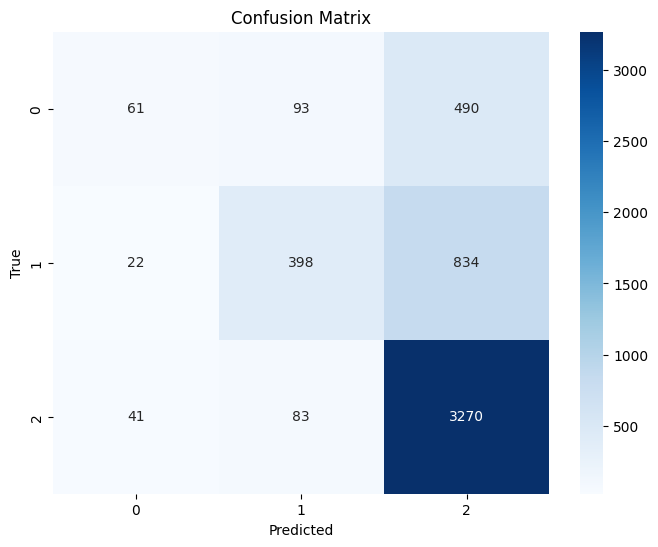

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Now you can use X_test and y_test for evaluation. Example using the loaded model:
y_pred = predictor.predict(df_test)
y_pred_prob = predictor.predict_proba(df_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_prob)
print(f"Accuracy: {accuracy}")
print(f"Log Loss: {logloss}")
print(classification_report(y_test,y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Optuna

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import optuna
from lightgbm import LGBMClassifier, early_stopping

In [ ]:
import numpy as np

# CSV 파일 경로 (Google Drive 내 파일 경로로 변경)
file_path = '/content/drive/MyDrive/메타코드_M/train.csv'  # 자신의 파일 경로로 수정


# Pandas를 사용하여 CSV 파일 읽기
df = pd.read_csv(file_path)

In [ ]:
# 'occyp_type', 'index' 컬럼 삭제
df.drop(['occyp_type', 'index'], axis=1, inplace=True)

# 범주값이 2개인 변수 전처리
df['gender'] = df['gender'].replace(['F','M'], [0,  1])
df['car'] = df['car'].replace(['N','Y'], [0,  1])
df['reality'] = df['reality'].replace(['N','Y'], [0,  1])

# IQR 기반 이상치 제거 함수
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# 자녀 수 이상치 처리
df = remove_outliers_iqr(df, 'child_num')

# 수입 컬럼을 로그 변환하고 이상치를 제거 후 역변환하는 방법
df = df.assign(income_total_log=lambda x: np.log1p(x['income_total']))  # 로그 변환
df = remove_outliers_iqr(df, 'income_total_log')
df['income_total'] = np.expm1(df['income_total_log'])  # 역변환
df = df.drop('income_total_log', axis=1)

# 고용 날짜 이상치 처리 (극단값 제거) - 0값도 제거
df = df[df['DAYS_EMPLOYED'] != 365243] # 극단치 제거
df = remove_outliers_iqr(df, 'DAYS_EMPLOYED')

# 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'family_size', 'credit' 컬럼을 정수형으로 변환합니다.
float_columns = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'family_size', 'credit']

for col in float_columns:
  if col in df.columns:  # 컬럼이 존재하는지 확인
    try:
        df[col] = df[col].astype(int)
    except (ValueError, TypeError):
        print(f"Warning: Could not convert column '{col}' to integer type. Check for non-numeric values.")

# 범주형 변수 원-핫 인코딩
categorical_cols = ['income_type', 'edu_type', 'family_type', 'house_type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

<ipython-input-105-4c5b7762315a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(['F','M'], [0,  1])
<ipython-input-105-4c5b7762315a>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['car'] = df['car'].replace(['N','Y'], [0,  1])
<ipython-input-105-4c5b7762315a>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_

In [ ]:
# 데이터 분할 (df 데이터프레임 사용)
X = df.drop('credit', axis=1)
y = df['credit']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
# 목적 함수 정의
def objective(trial):
    # LGBMClassifier 하이퍼파라미터 설정
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log = True), # default = 0.1
        'num_leaves': trial.suggest_int('num_leaves', 20, 100), # default = 31
        'max_depth': trial.suggest_int('max_depth', -1, 50), # default = -1
        'n_estimators' : trial.suggest_int('n_estimators', 100, 2000), # default = 100
        'subsample': trial.suggest_float('subsample', 0.8, 1.0), # default = 1.0
        'min_child_samples' : trial.suggest_int('min_data_in_leaf', 1, 100), # default = 20
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0), # default = 1.0
    }

    # LGBMClassifier 모델 생성 및 학습
    model = LGBMClassifier(**param, n_jobs=-1,
                           class_weight='balanced',
                           random_state=42,
                           )

    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='multi_logloss',
              callbacks=[early_stopping(stopping_rounds=50, verbose=False)]
    )

    # 검증 데이터에 대한 예측 확률
    proba = model.predict_proba(X_val)  # 확률 예측

    # 정확도 계산 (log loss)
    logloss = log_loss(y_val, proba)  # y_val은 실제 레이블, proba는 예측된 확률

    return logloss

# Optuna 튜닝 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)


# 최적 파라미터 출력
best_params = study.best_trial.params
print("Best trial:")
print(best_params)

[I 2025-02-02 07:41:05,462] A new study created in memory with name: no-name-7597a0d4-033f-49a5-99a8-2afe6ee0861a
[I 2025-02-02 07:41:08,052] Trial 0 finished with value: 0.8560068852224935 and parameters: {'learning_rate': 0.10056469910925404, 'num_leaves': 97, 'max_depth': 25, 'n_estimators': 1134, 'subsample': 0.8188850925247969, 'min_data_in_leaf': 99, 'colsample_bytree': 0.8647360893911912}. Best is trial 0 with value: 0.8560068852224935.
[I 2025-02-02 07:41:14,146] Trial 1 finished with value: 0.8457017637209957 and parameters: {'learning_rate': 0.03340878210904122, 'num_leaves': 35, 'max_depth': 15, 'n_estimators': 1668, 'subsample': 0.9376499512726357, 'min_data_in_leaf': 11, 'colsample_bytree': 0.8773953022702936}. Best is trial 1 with value: 0.8457017637209957.
[I 2025-02-02 07:41:20,221] Trial 2 finished with value: 0.872900659922603 and parameters: {'learning_rate': 0.06462577895542447, 'num_leaves': 39, 'max_depth': 14, 'n_estimators': 562, 'subsample': 0.9730796518600789,

Best trial:
{'learning_rate': 0.01845771885814371, 'num_leaves': 83, 'max_depth': 33, 'n_estimators': 1871, 'subsample': 0.8781314190325067, 'min_data_in_leaf': 11, 'colsample_bytree': 0.828852017653753}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_model = LGBMClassifier(**best_params,
                             n_jobs=-1,
                             class_weight='balanced',
                             random_state=42,)
final_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', colsample_bytree=0.828852017653753,
               learning_rate=0.01845771885814371, max_depth=33,
               min_data_in_leaf=11, n_estimators=1871, n_jobs=-1, num_leaves=83,
               random_state=42, subsample=0.8781314190325067)

In [ ]:
# optuna Pred
y_pred_final = final_model.predict(X_test)
y_proba_final = final_model.predict_proba(X_test)

# optuna Results
accuracy_final = accuracy_score(y_test, y_pred_final)
log_loss_final = log_loss(y_test, y_proba_final)
cf_final = confusion_matrix(y_test, y_pred_final)

print(f'정확도 : {round(accuracy_final,4)}')
print(f'Log_loss : {round(log_loss_final,4)}')
print(f'''Optuna LGBM의 CF :
{cf_final}''')

정확도 : 0.681
Log_loss : 0.7999
Optuna LGBM의 CF :
[[ 185   76  227]
 [  68  530  397]
 [ 184  333 2028]]


## 오토ML - preprocessing

In [ ]:
import numpy as np

# CSV 파일 경로 (Google Drive 내 파일 경로로 변경)
file_path = '/content/drive/MyDrive/메타코드_M/train.csv'  # 자신의 파일 경로로 수정


# Pandas를 사용하여 CSV 파일 읽기
df = pd.read_csv(file_path)

In [ ]:
# 모델링을 위한 데이터 셋 생성
# 극단값이 존재하는 컬럼이 있어 정규화, 표준화를 실행해볼 필요

# 데이터 불러오기
df = pd.read_csv(file_path)

# 'index' 컬럼 삭제
df.drop(['index'], axis=1, inplace=True)

# 최빈값으로 결측치 채우기
df['occyp_type'] = df['occyp_type'].fillna(df['occyp_type'].mode()[0])

# 범주값이 2개인 변수 전처리
df['gender'] = df['gender'].replace(['F','M'], [0,  1])
df['car'] = df['car'].replace(['N','Y'], [0,  1])
df['reality'] = df['reality'].replace(['N','Y'], [0,  1])

# 수입 컬럼 로그화
df['income_total_log'] = np.log1p(df['income_total']) # 로그 변환
df['income_total'] = np.expm1(df['income_total_log']) # 역변환
df = df.drop('income_total_log', axis=1)

# 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'family_size', 'credit' 컬럼을 정수형으로 변환합니다.
float_columns = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'family_size', 'credit']

for col in float_columns:
  if col in df.columns:  # 컬럼이 존재하는지 확인
    try:
        df[col] = df[col].astype(int)
    except (ValueError, TypeError):
        print(f"Warning: Could not convert column '{col}' to integer type. Check for non-numeric values.")

# 범주형 변수 원-핫 인코딩
categorical_cols = ['income_type', 'edu_type', 'family_type', 'house_type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

<ipython-input-259-ad2efce46563>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(['F','M'], [0,  1])
<ipython-input-259-ad2efce46563>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['car'] = df['car'].replace(['N','Y'], [0,  1])
<ipython-input-259-ad2efce46563>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.s

In [ ]:
# 데이터 분할 (df 데이터프레임 사용)
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=42, stratify=df['credit'])
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, stratify=df_temp['credit'])

In [ ]:
from autogluon.tabular import TabularPredictor

# Define the evaluation metric
eval_metric = 'log_loss'

#path = 'drive/MyDrive/Metacode'

# Train the AutoGluon model
predictor = TabularPredictor(label='credit', eval_metric=eval_metric, verbosity=2, ) #path=path)
predictor.fit(df_train, tuning_data=df_val, time_limit=3600)

# Evaluate the model
leaderboard = predictor.leaderboard(silent=True)
print(leaderboard)

No path specified. Models will be saved in: "AutogluonModels/ag-20250202_093325"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       8.86 GB / 12.67 GB (69.9%)
Disk Space Avail:   75.57 GB / 112.64 GB (67.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

                  model  score_val eval_metric  pred_time_val    fit_time  \
0   WeightedEnsemble_L2  -0.727759    log_loss       2.900775   72.560467   
1         LightGBMLarge  -0.753227    log_loss       0.714926    6.349687   
2              LightGBM  -0.762373    log_loss       0.889956    4.273353   
3               XGBoost  -0.766434    log_loss       0.318262   12.396482   
4            LightGBMXT  -0.770163    log_loss       3.679549    9.858403   
5              CatBoost  -0.773955    log_loss       0.118698  105.993595   
6      RandomForestGini  -0.780549    log_loss       0.542603    7.012190   
7      RandomForestEntr  -0.788964    log_loss       0.333467    8.206719   
8        ExtraTreesGini  -0.803026    log_loss       0.349206    5.896770   
9        ExtraTreesEntr  -0.808204    log_loss       0.329946    4.567039   
10       NeuralNetTorch  -0.819807    log_loss       0.043768   33.640893   
11      NeuralNetFastAI  -0.839943    log_loss       0.066950   19.689352   

In [ ]:
# 데이터 분할
X_test = df_test.drop('credit', axis=1)
y_test = df_test['credit']

Accuracy: 0.7125850340136054
Log Loss: 0.7312210605355567
              precision    recall  f1-score   support

           0       0.52      0.18      0.27       644
           1       0.67      0.39      0.49      1254
           2       0.73      0.93      0.82      3394

    accuracy                           0.71      5292
   macro avg       0.64      0.50      0.53      5292
weighted avg       0.69      0.71      0.67      5292

Confusion Matrix:
[[ 118   94  432]
 [  32  485  737]
 [  79  147 3168]]


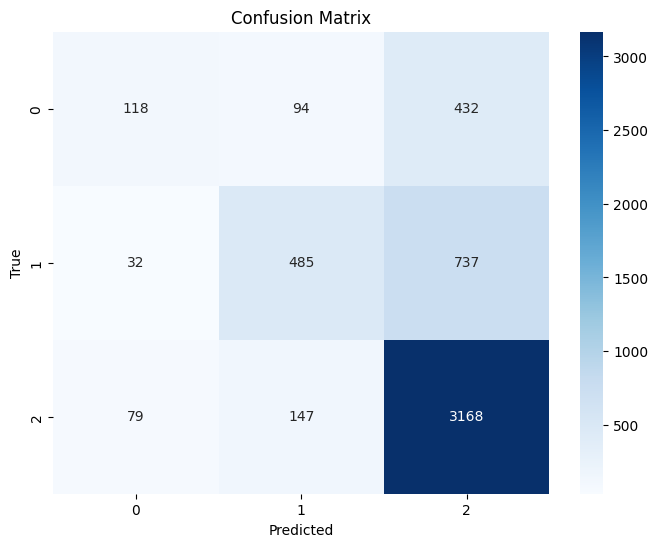

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Now you can use X_test and y_test for evaluation. Example using the loaded model:
y_pred = predictor.predict(X_test)
y_pred_prob = predictor.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_prob)
print(f"Accuracy: {accuracy}")
print(f"Log Loss: {logloss}")
print(classification_report(y_test,y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.727759,log_loss,2.900775,72.560467,0.002249,0.626055,2,True,14
1,LightGBMLarge,-0.753227,log_loss,0.714926,6.349687,0.714926,6.349687,1,True,13
2,LightGBM,-0.762373,log_loss,0.889956,4.273353,0.889956,4.273353,1,True,5
3,XGBoost,-0.766434,log_loss,0.318262,12.396482,0.318262,12.396482,1,True,11
4,LightGBMXT,-0.770163,log_loss,3.679549,9.858403,3.679549,9.858403,1,True,4
5,CatBoost,-0.773955,log_loss,0.118698,105.993595,0.118698,105.993595,1,True,8
6,RandomForestGini,-0.780549,log_loss,0.542603,7.012190,0.542603,7.012190,1,True,6
7,RandomForestEntr,-0.788964,log_loss,0.333467,8.206719,0.333467,8.206719,1,True,7
8,ExtraTreesGini,-0.803026,log_loss,0.349206,5.896770,0.349206,5.896770,1,True,9
9,ExtraTreesEntr,-0.808204,log_loss,0.329946,4.567039,0.329946,4.567039,1,True,10


# 평가

1. **모델 로드 및 예측**:
   - 랜덤 서치로 튜닝한 최적의 XGBoost 모델을 로드한 후, 테스트 데이터셋에 대해 확률 예측을 수행했습니다.

2. **예측 결과 데이터프레임 변환**:
   - 예측 확률 결과를 데이터프레임으로 변환하고, 최종 데이터프레임과 결합하여 최종 결과를 준비했습니다.

3. **결과 확인**:
   - 최종 데이터프레임의 상위 5개 행을 출력하여 예측 결과를 확인했습니다.

4. **점수 확인**:
   - 제출 결과로 얻은 퍼블릭 점수는 0.7377, 프라이빗 점수는 0.7115였습니다.

## 주요 인사이트
- **모델 성능**: 다양한 시도를 통해 랜덤 서치로 튜닝한 XGBoost 모델이 가장 높은 성능을 보였으며, 이를 최종 제출 모델로 선택했습니다.


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/메타코드_M/test.csv')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [ ]:
# 범주값이 2개인 변수 전처리
df_test['gender'] = df_test['gender'].replace(['F','M'], [0,  1])
df_test['car'] = df_test['car'].replace(['N','Y'], [0,  1])
df_test['reality'] = df_test['reality'].replace(['N','Y'], [0,  1])

# 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'family_size', 'credit' 컬럼을 정수형으로 변환합니다.
float_columns = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'family_size', 'credit']

for col in float_columns:
    if col in df_test.columns:  # 컬럼이 존재하는지 확인
        try:
            df_test[col] = df_test[col].astype(int)
        except (ValueError, TypeError):
            print(f"Warning: Could not convert column '{col}' to integer type. Check for non-numeric values.")

# 범주형 변수 원-핫 인코딩
categorical_cols = ['income_type', 'edu_type', 'family_type', 'house_type']
df_test = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)


<ipython-input-222-49be687035a6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['gender'] = df_test['gender'].replace(['F','M'], [0,  1])
<ipython-input-222-49be687035a6>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['car'] = df_test['car'].replace(['N','Y'], [0,  1])
<ipython-input-222-49be687035a6>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future be

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   index                                   10000 non-null  int64 
 1   gender                                  10000 non-null  int64 
 2   car                                     10000 non-null  int64 
 3   reality                                 10000 non-null  int64 
 4   child_num                               10000 non-null  int64 
 5   income_total                            10000 non-null  int64 
 6   DAYS_BIRTH                              10000 non-null  int64 
 7   DAYS_EMPLOYED                           10000 non-null  int64 
 8   FLAG_MOBIL                              10000 non-null  int64 
 9   work_phone                              10000 non-null  int64 
 10  phone                                   10000 non-null  int64 
 11  ema

In [ ]:
final = df_test.copy()

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   index                                   10000 non-null  int64 
 1   gender                                  10000 non-null  int64 
 2   car                                     10000 non-null  int64 
 3   reality                                 10000 non-null  int64 
 4   child_num                               10000 non-null  int64 
 5   income_total                            10000 non-null  int64 
 6   DAYS_BIRTH                              10000 non-null  int64 
 7   DAYS_EMPLOYED                           10000 non-null  int64 
 8   FLAG_MOBIL                              10000 non-null  int64 
 9   work_phone                              10000 non-null  int64 
 10  phone                                   10000 non-null  int64 
 11  ema

In [ ]:
final = final['index']

In [ ]:
# 'occyp_type', 'index' 컬럼 삭제
df_test.drop(['occyp_type', 'index'], axis=1, inplace=True)

In [ ]:
import joblib
loaded_model = joblib.load('/content/drive/MyDrive/best_model.joblib')

In [ ]:
y_proba_test = loaded_model.predict_proba(df_test)

In [ ]:
y_proba_test.shape

(10000, 3)

In [ ]:
# y_proba_test를 데이터프레임으로 변환
proba_df = pd.DataFrame(y_proba_test, columns=[0, 1, 2])

# proba_df의 인덱스를 reset하여 새로운 열로 추가
proba_df.reset_index(drop=True, inplace=True)

# final 데이터프레임과 proba_df를 concat으로 합치기
final_df = pd.concat([final.reset_index(drop=True), proba_df], axis=1)

# 결과 확인
print(final_df.head())

   index         0         1         2
0  26457  0.046205  0.032931  0.920864
1  26458  0.085034  0.172842  0.742124
2  26459  0.045727  0.103940  0.850333
3  26460  0.140093  0.086702  0.773206
4  26461  0.107441  0.198009  0.694550


In [ ]:
final_df

,index,0,1,2
0,26457,0.046205,0.032931,0.920864
1,26458,0.085034,0.172842,0.742124
2,26459,0.045727,0.103940,0.850333
3,26460,0.140093,0.086702,0.773206
4,26461,0.107441,0.198009,0.694550
...,...,...,...,...
9995,36452,0.119175,0.232118,0.648707
9996,36453,0.134372,0.434134,0.431494
9997,36454,0.025865,0.067424,0.906711
9998,36455,0.142850,0.226621,0.630528


In [ ]:
from google.colab import files
final_df.to_csv('final_df.csv', encoding='utf-8-sig', index=False)
files.download('final_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_df.shape

(10000, 4)

# 결론

이번 모델링 과정에서 리더보드 점수가 높은 모델들을 분석해보니, 'ID'라는 변수를 생성하여 사용하는 것을 발견했습니다. 이 변수는 각 사용자의 고유성을 파악하기 위해 여러 컬럼의 값을 결합하여 만든 것으로, 동일한 사용자가 여러 개의 카드를 발급받을 가능성을 고려하여 `begin_month`는 제외하였습니다.

ID 생성 방법은 다음과 같습니다:

- 여러 컬럼의 값들을 문자열로 변환하여 결합함으로써, 고유한 사용자 식별자를 생성했습니다. 이 과정에서 사용된 컬럼들은 `child_num`, `income_total`, `DAYS_BIRTH`, `DAYS_EMPLOYED`, `work_phone`, `phone`, `email`, `family_size`, `gender`, `car`, `reality`, `income_type`, `edu_type`, `family_type`, `house_type`, `occyp_type` 등입니다.

이렇게 생성된 ID 변수가 모델 성능에 큰 영향을 미쳐 약 0.66의 로그 손실을 출력하는 모델을 만들 수 있었습니다. 이를 통해 변수 생성이 모델 성능에 얼마나 중요한지를 다시 한 번 깨닫게 되었습니다.

### 추가 인사이트
- **특성 엔지니어링의 중요성**: 데이터셋에 새로운 변수를 추가하는 과정에서 모델의 예측 성능이 크게 향상될 수 있음을 확인했습니다. 이는 데이터 과학에서 특성 엔지니어링이 성공적인 모델링의 핵심 요소임을 강조합니다.
- **도메인 지식 활용**: 변수 생성에 있어 도메인 지식을 활용하면 더 효과적인 특성을 만들 수 있습니다. 예를 들어, 특정 사용자 그룹의 행동 패턴을 반영할 수 있는 변수를 생성하는 것이 가능합니다.


이번 경험을 통해 모델링 과정에서의 변수가 얼마나 중요한지를 깊이 이해할 수 있었고, 향후 데이터 분석 및 모델링 작업에 큰 도움이 될 것입니다.
